In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, f1_score, recall_score
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

data = pd.read_csv('term.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


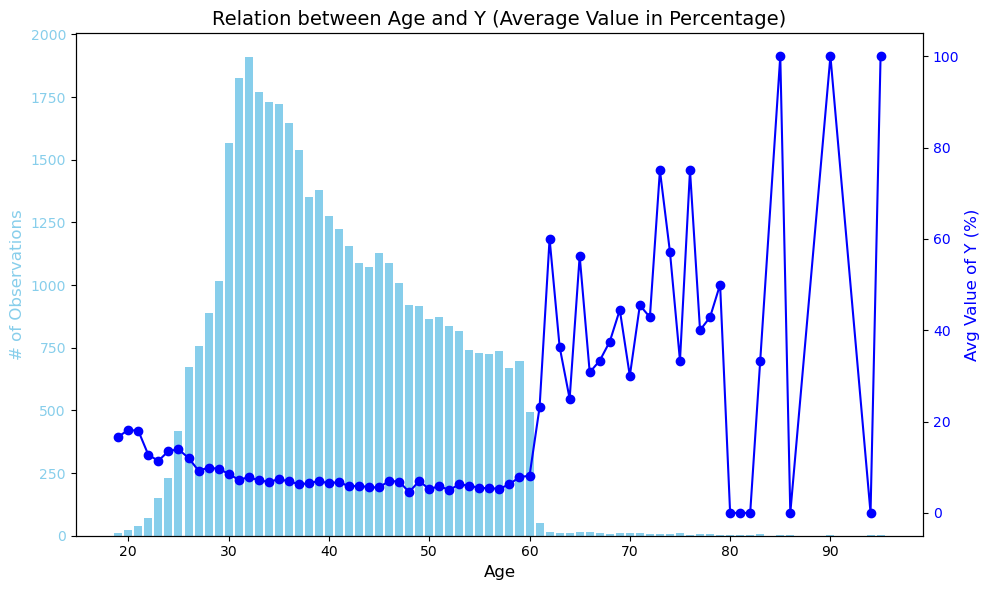

In [14]:
# Step 1: Create the 'y_binary' column
data['y_binary'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Step 2: Group the data by 'age'
grouped_data = data.groupby('age').agg(
    num_observations=('y_binary', 'count'),
    avg_value_y=('y_binary', 'mean')
).reset_index()

# Step 3: Convert the average value of 'y' into percentage
grouped_data['avg_value_y_percentage'] = grouped_data['avg_value_y'] * 100

# Step 4: Plot the graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for number of observations
ax1.bar(grouped_data['age'], grouped_data['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average value of 'y' in percentage
ax2 = ax1.twinx()
ax2.plot(grouped_data['age'], grouped_data['avg_value_y_percentage'], color='blue', label='Avg Value of Y (%)', marker='o')
ax2.set_ylabel('Avg Value of Y (%)', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and grid
plt.title('Relation between Age and Y (Average Value in Percentage)', fontsize=14)
fig.tight_layout()
plt.show()


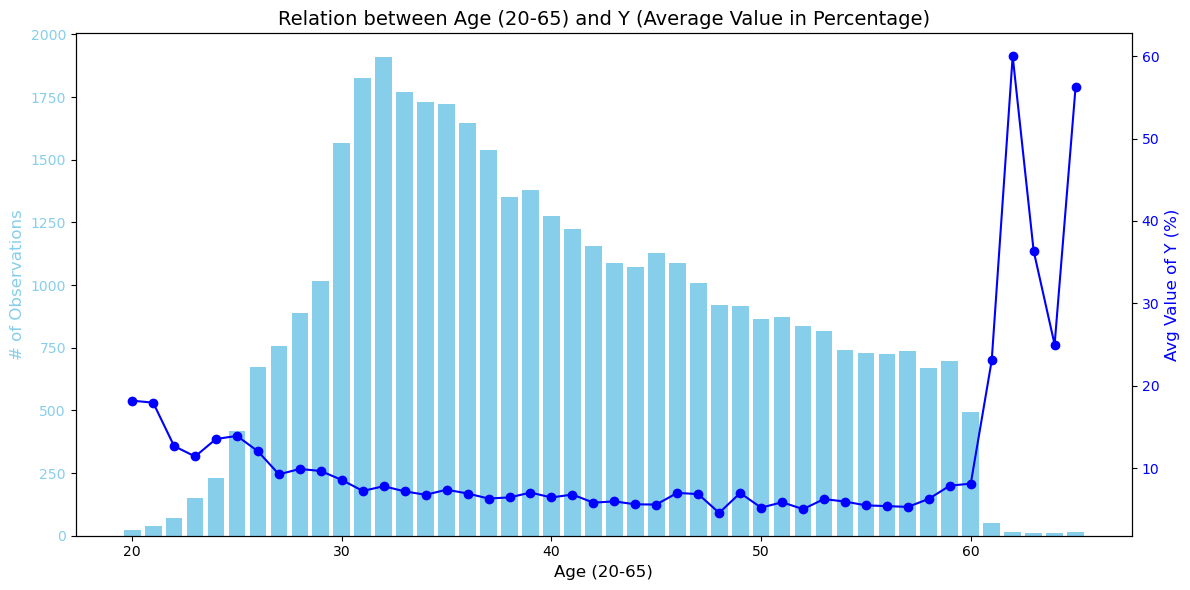

In [15]:
# Filter the data for ages between 20 and 65
filtered_data = grouped_data[(grouped_data['age'] >= 20) & (grouped_data['age'] <= 65)]

# Plot the graph for filtered age range
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(filtered_data['age'], filtered_data['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel('Age (20-65)', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average value of 'y' in percentage
ax2 = ax1.twinx()
ax2.plot(filtered_data['age'], filtered_data['avg_value_y_percentage'], color='blue', label='Avg Value of Y (%)', marker='o')
ax2.set_ylabel('Avg Value of Y (%)', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and grid
plt.title('Relation between Age (20-65) and Y (Average Value in Percentage)', fontsize=14)
fig.tight_layout()
plt.show()


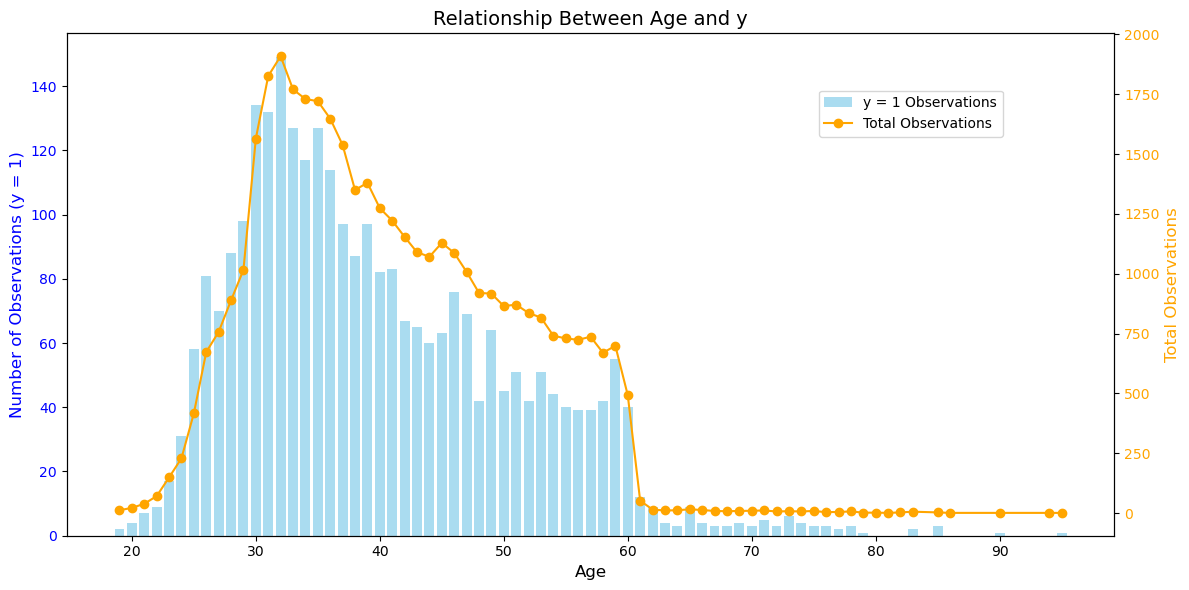

In [16]:
data['y_binary'] = data['y'].map({'yes': 1, 'no': 0})

# Group data by age to calculate the necessary metrics
age_summary = data.groupby('age').agg(
    total_observations=('y_binary', 'count'),  # Total number of observations per age
    y_count=('y_binary', 'sum')               # Total number of "y = 1" per age
).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar graph: Number of observations with y = 1 (height of bars)
ax1.bar(age_summary['age'], age_summary['y_count'], color='skyblue', label='y = 1 Observations', alpha=0.7)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Number of Observations (y = 1)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Relationship Between Age and y', fontsize=14)

# Line graph: Total number of observations per age
ax2 = ax1.twinx()
ax2.plot(age_summary['age'], age_summary['total_observations'], color='orange', label='Total Observations', linestyle='-', marker='o')
ax2.set_ylabel('Total Observations', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legend
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9), bbox_transform=ax1.transAxes)

# Show the plot
plt.tight_layout()
plt.show()


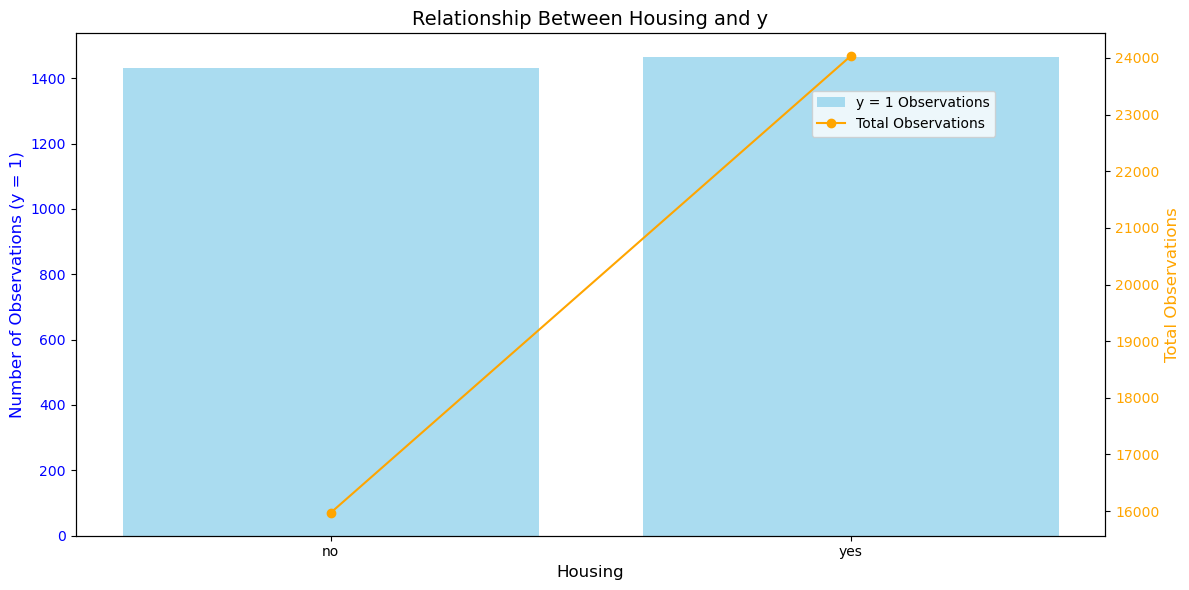

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into the 'data' DataFrame

# Convert 'y' column to binary format: 1 for "yes" and 0 for "no"
data['y_binary'] = data['y'].map({'yes': 1, 'no': 0})

# Group data by age to calculate the necessary metrics
housing_summary = data.groupby('housing').agg(
    total_observations=('y_binary', 'count'),  # Total number of observations per age
    y_count=('y_binary', 'sum')               # Total number of "y = 1" per age
).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar graph: Number of observations with y = 1 (height of bars)
ax1.bar(housing_summary['housing'], housing_summary['y_count'], color='skyblue', label='y = 1 Observations', alpha=0.7)
ax1.set_xlabel('Housing', fontsize=12)
ax1.set_ylabel('Number of Observations (y = 1)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Relationship Between Housing and y', fontsize=14)

# Line graph: Total number of observations per age
ax2 = ax1.twinx()
ax2.plot(housing_summary['housing'], housing_summary['total_observations'], color='orange', label='Total Observations', linestyle='-', marker='o')
ax2.set_ylabel('Total Observations', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legend
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9), bbox_transform=ax1.transAxes)

# Show the plot
plt.tight_layout()
plt.show()


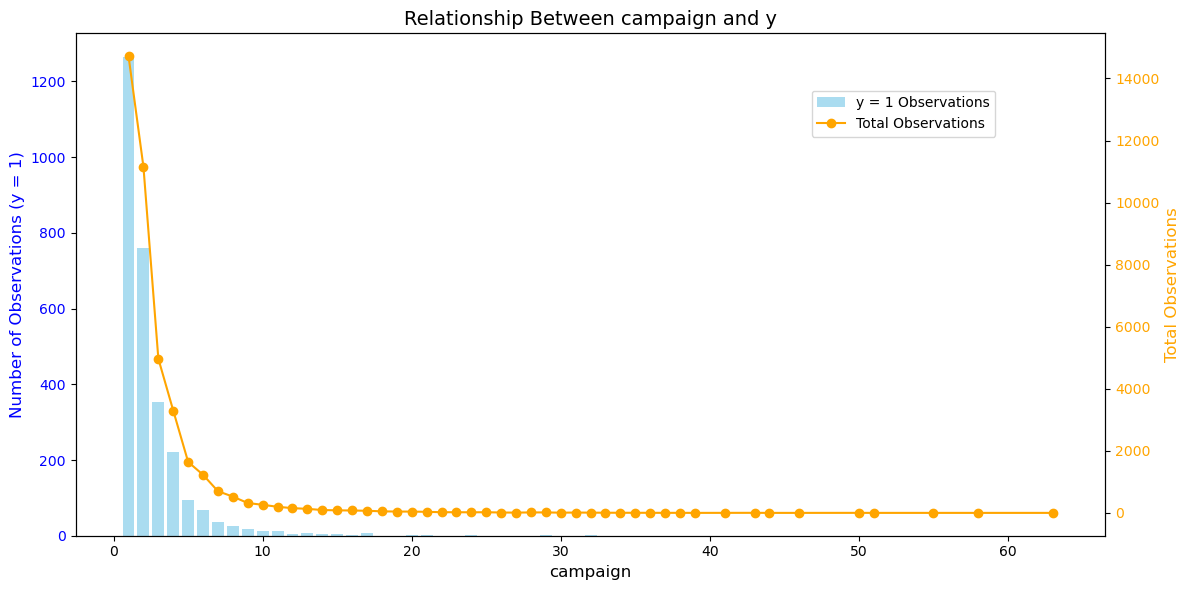

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into the 'data' DataFrame

# Convert 'y' column to binary format: 1 for "yes" and 0 for "no"
data['y_binary'] = data['y'].map({'yes': 1, 'no': 0})

# Group data by age to calculate the necessary metrics
campaign_summary = data.groupby('campaign').agg(
    total_observations=('y_binary', 'count'),  # Total number of observations per age
    y_count=('y_binary', 'sum')               # Total number of "y = 1" per age
).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar graph: Number of observations with y = 1 (height of bars)
ax1.bar(campaign_summary['campaign'], campaign_summary['y_count'], color='skyblue', label='y = 1 Observations', alpha=0.7)
ax1.set_xlabel('campaign', fontsize=12)
ax1.set_ylabel('Number of Observations (y = 1)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Relationship Between campaign and y', fontsize=14)

# Line graph: Total number of observations per age
ax2 = ax1.twinx()
ax2.plot(campaign_summary['campaign'], campaign_summary['total_observations'], color='orange', label='Total Observations', linestyle='-', marker='o')
ax2.set_ylabel('Total Observations', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legend
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9), bbox_transform=ax1.transAxes)

# Show the plot
plt.tight_layout()
plt.show()


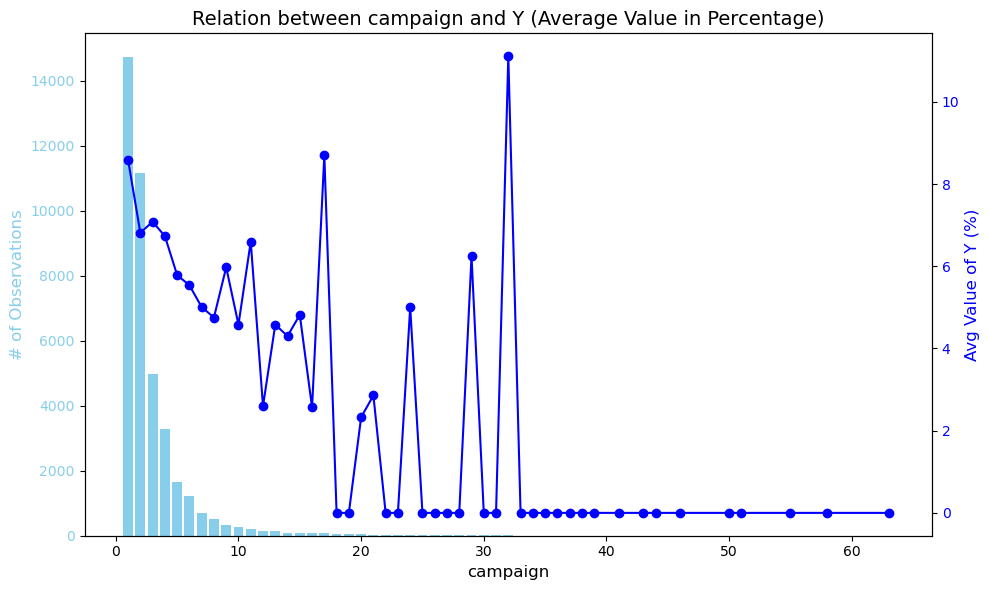

In [19]:
# Step 1: Create the 'y_binary' column
data['y_binary'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Step 2: Group the data by 'age'
grouped_data = data.groupby('campaign').agg(
    num_observations=('y_binary', 'count'),
    avg_value_y=('y_binary', 'mean')
).reset_index()

# Step 3: Convert the average value of 'y' into percentage
grouped_data['avg_value_y_percentage'] = grouped_data['avg_value_y'] * 100

# Step 4: Plot the graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for number of observations
ax1.bar(grouped_data['campaign'], grouped_data['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel('campaign', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average value of 'y' in percentage
ax2 = ax1.twinx()
ax2.plot(grouped_data['campaign'], grouped_data['avg_value_y_percentage'], color='blue', label='Avg Value of Y (%)', marker='o')
ax2.set_ylabel('Avg Value of Y (%)', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and grid
plt.title('Relation between campaign and Y (Average Value in Percentage)', fontsize=14)
fig.tight_layout()
plt.show()


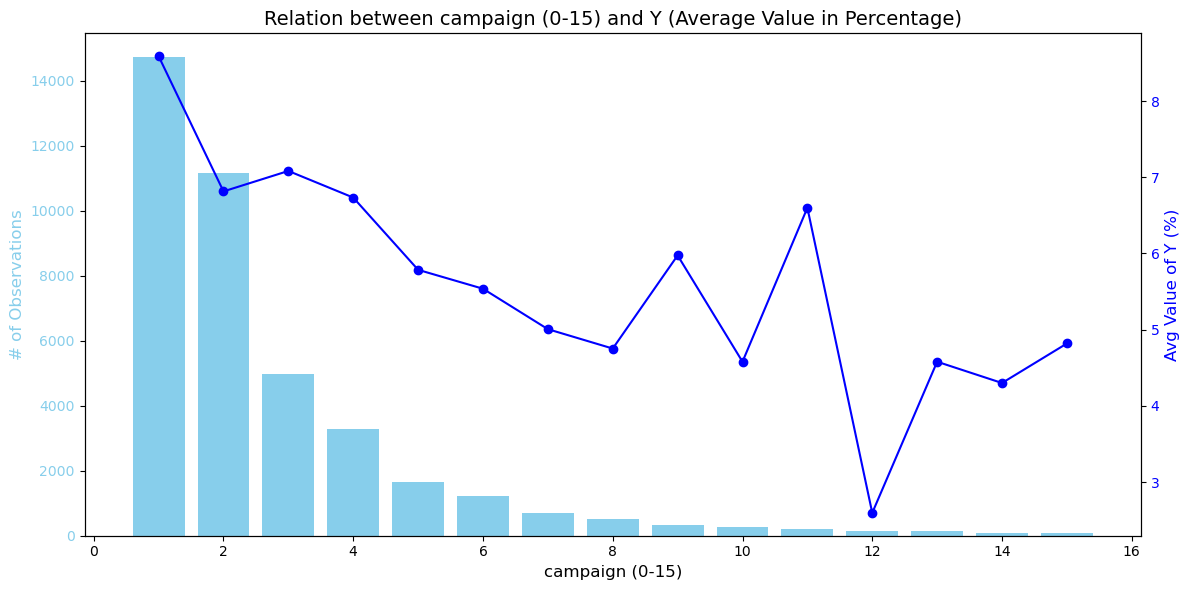

In [20]:
# Filter the data for ages between 20 and 65
filtered_data = grouped_data[(grouped_data['campaign'] >= 0) & (grouped_data['campaign'] <= 15)]

# Plot the graph for filtered age range
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(filtered_data['campaign'], filtered_data['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel('campaign (0-15)', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average value of 'y' in percentage
ax2 = ax1.twinx()
ax2.plot(filtered_data['campaign'], filtered_data['avg_value_y_percentage'], color='blue', label='Avg Value of Y (%)', marker='o')
ax2.set_ylabel('Avg Value of Y (%)', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and grid
plt.title('Relation between campaign (0-15) and Y (Average Value in Percentage)', fontsize=14)
fig.tight_layout()
plt.show()


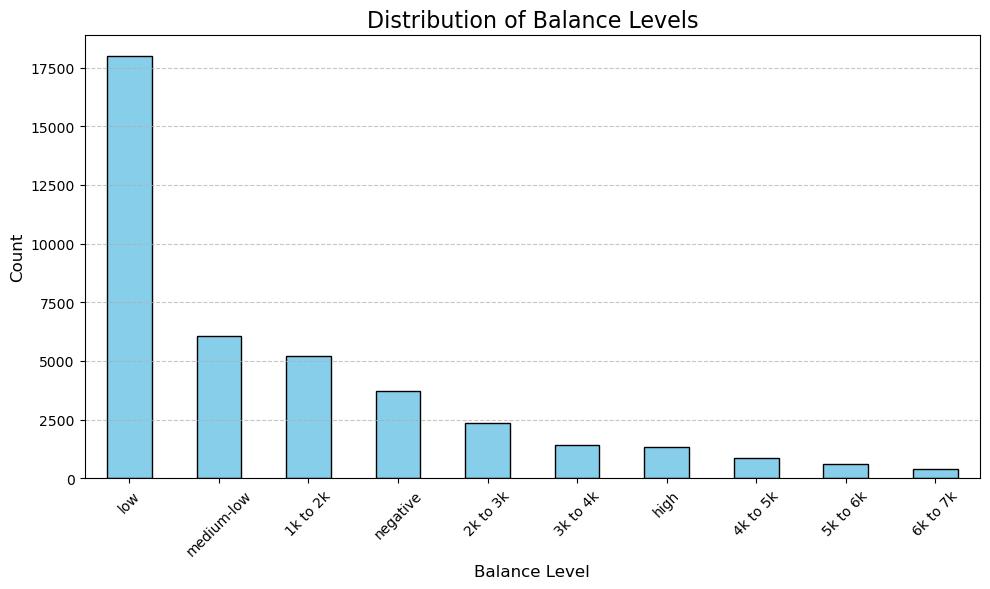

In [31]:

# Define the function to categorize balance levels
def balance_level(balance):
    if balance < 0:
        return 'negative'
    elif 0 <= balance < 500:
        return 'low'
    elif 500 <= balance < 1000:
        return 'medium-low'
    elif 1000 <= balance < 2000:
        return '1k to 2k'
    elif 2000 <= balance < 3000:
        return '2k to 3k'
    elif 3000 <= balance < 4000:
        return '3k to 4k'
    elif 4000 <= balance < 5000:
        return '4k to 5k'
    elif 5000 <= balance < 6000:
        return '5k to 6k'
    elif 6000 <= balance < 7000:
        return '6k to 7k'
    else:
        return 'high'

# Apply the function to create a new column
data['Balance_Level'] = data['balance'].apply(balance_level)

# Count the number of occurrences for each balance level
balance_level_counts = data['Balance_Level'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
balance_level_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Balance Levels', fontsize=16)
plt.xlabel('Balance Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


As in the above chart we can clearly see for "low" cateogry there are many counts of observations so I am going to 
divide low group for further analysis

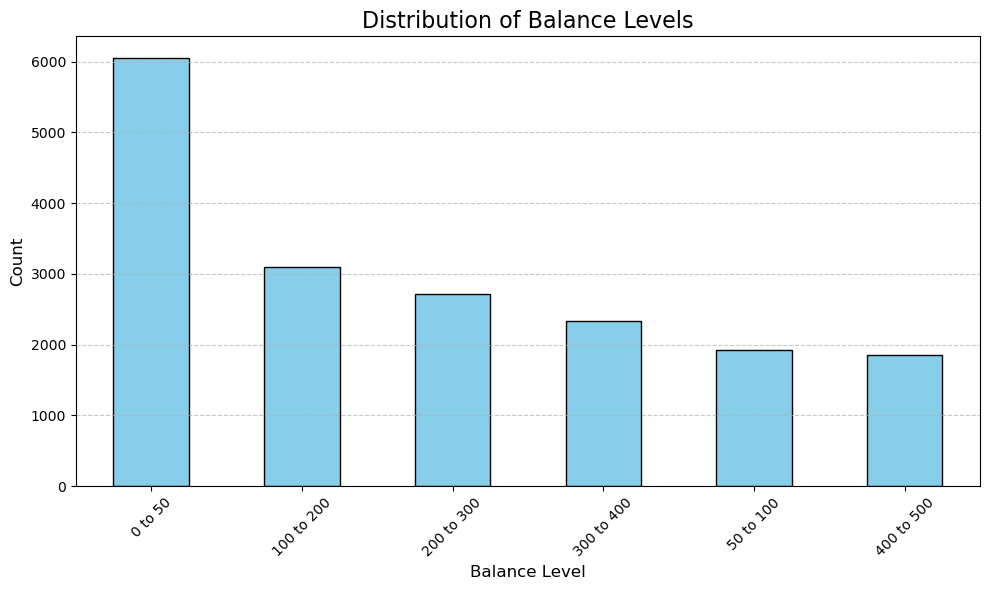

In [33]:
def balance_level(balance):
    if 0 <= balance < 50:
        return '0 to 50'
    elif 50 <= balance < 100:
        return '50 to 100'
    elif 100 <= balance < 200:
        return '100 to 200'
    elif 200 <= balance < 300:
        return '200 to 300'
    elif 300 <= balance < 400:
        return '300 to 400'
    elif 400 <= balance < 500:
        return '400 to 500'

# Apply the function to create a new column
data['Balance_Level'] = data['balance'].apply(balance_level)

# Count the number of occurrences for each balance level
balance_level_counts = data['Balance_Level'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
balance_level_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Balance Levels', fontsize=16)
plt.xlabel('Balance Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

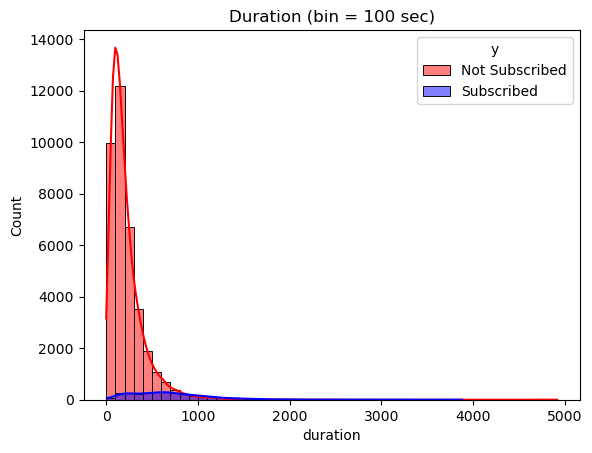

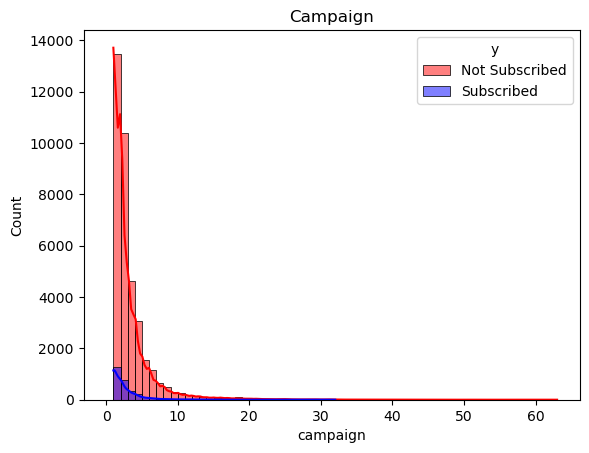

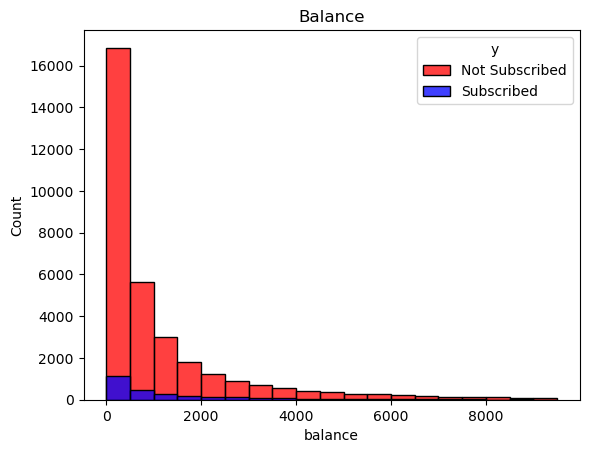

In [22]:
sns.histplot(data=data[data["y"]=="no"], x="duration", color='red', label ='Not Subscribed', bins = list(range(0, 2000,100 )), kde = True)
sns.histplot(data=data[data["y"]=="yes"], x="duration", color='blue', label ='Subscribed', bins = list(range(0, 2000,100 )), kde = True)
plt.title('Duration (bin = 100 sec)')
plt.legend(title = 'y')
plt.show()

sns.histplot(data=data[data["y"]=="no"], x="campaign", color='red', label ='Not Subscribed', bins = list(range(0, 20,1 )), kde = True)
sns.histplot(data=data[data["y"]=="yes"], x="campaign", color='blue', label ='Subscribed', bins = list(range(0, 20,1 )), kde = True)
plt.title('Campaign')
plt.legend(title = 'y')
plt.show()

sns.histplot(data=data[data["y"]=="no"], x="balance", color='red', label ='Not Subscribed', bins = list(range(0, 10000, 500)))
sns.histplot(data=data[data["y"]=="yes"], x="balance", color='blue', label ='Subscribed', bins = list(range(0, 10000, 500)))
plt.title('Balance')
plt.legend(title = 'y')
plt.show()

From the above graphs we can predict that majority of customers were engaed over call for a duration of 
more than 200 secconds. Moreover,greater number of customers were called only 1-2 times and many customers 
keep low average annual balance.

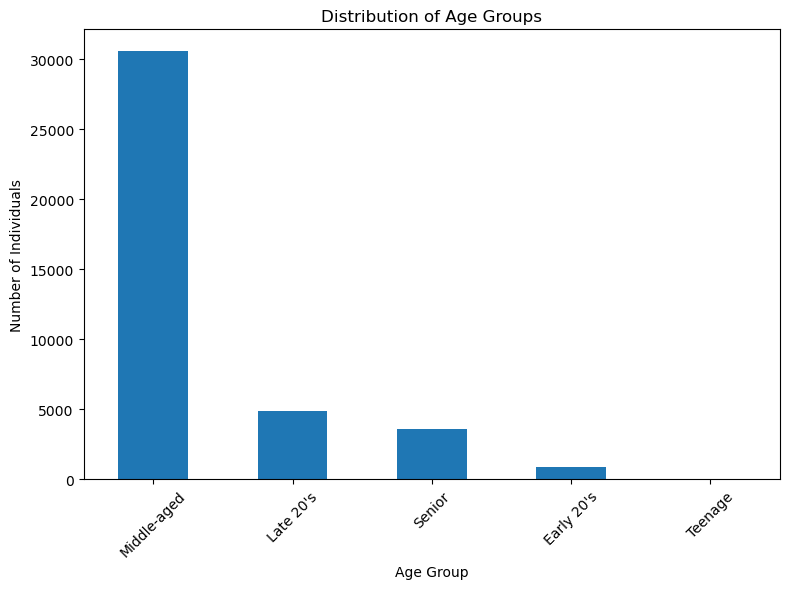

In [71]:
def categorize_age(age):
    if age <= 20:
        return 'Teenage'
    elif 21 <= age <= 25:
        return "Early 20's"
    elif 26 <= age <= 30:
        return "Late 20's"
    elif 31 <= age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

# Apply the categorization
data['Age Group'] = data['age'].apply(categorize_age)

# Count the number of individuals in each age group
age_group_counts = data['Age Group'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


By this graph it is clear term deposit is subscriped by middle aged group from 30 to 50  

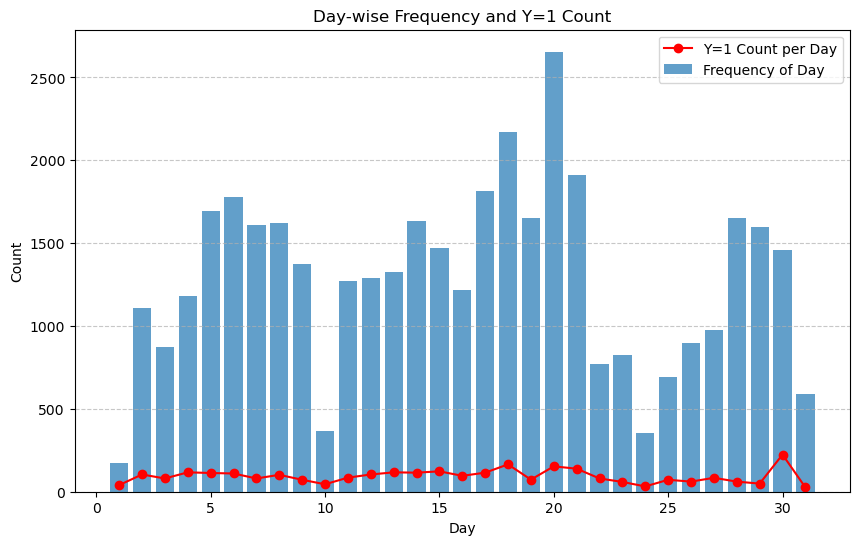

In [75]:
data['y_numeric'] = data['y'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Count 'y=1' observations for each day
y_equals_one_per_day = data[data['y_numeric'] == 1].groupby('day')['y_numeric'].count()

# Prepare data for bar graph (frequency of 'day')
day_counts = data['day'].value_counts().sort_index()

# Plot the bar graph and line graph
plt.figure(figsize=(10, 6))

# Bar graph for the frequency of 'day'
plt.bar(day_counts.index, day_counts.values, label='Frequency of Day', alpha=0.7)

# Line graph for 'y=1' counts
plt.plot(y_equals_one_per_day.index, y_equals_one_per_day.values, label='Y=1 Count per Day', marker='o', color='red')

# Adding titles and labels
plt.title('Day-wise Frequency and Y=1 Count')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
# Load the dataset
data = pd.read_csv('term.csv')

# 1. Age Groups: Categorize age into groups
def age_group(age):
    if age < 30:
        return 'young'
    elif 30 <= age < 60:
        return 'middle-aged'
    else:
        return 'senior'

data['age_group'] = data['age'].apply(age_group)

# 2. Balance Levels: Categorize balance into levels
def balance_level(balance):
    if balance < 0:
        return 'negative'
    elif 0 <= balance < 1000:
        return 'low'
    elif 1000 <= balance < 5000:
        return 'medium'
    else:
        return 'high'

data['balance_level'] = data['balance'].apply(balance_level)

# 3. Contact Time: Create features for season based on month
season_mapping = {
    'dec': 'winter', 'jan': 'winter', 'feb': 'winter',
    'mar': 'spring', 'apr': 'spring', 'may': 'spring',
    'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
    'sep': 'autumn', 'oct': 'autumn', 'nov': 'autumn'
}
data['season'] = data['month'].map(season_mapping)

# 4. Call Efficiency: Derive efficiency metrics from duration and campaign
data['call_efficiency'] = data['duration'] / (data['campaign'] + 1)

# 5. Encoding Categorical Variables: One-hot encode categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'season', 'age_group', 'balance_level']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 6. Interaction Features: Combine housing and loan to assess combined risk
data_encoded['housing_loan'] = ((data['housing'] == 'yes') & (data['loan'] == 'yes')).astype(int)

# 7. Handle missing information: Replace 'unknown' with a placeholder or mode
for col in ['job', 'education', 'contact']:
    data[col] = data[col].replace('unknown', 'other')

# Save or display the transformed dataset
data_encoded.to_csv('term_transformed.csv', index=False)


In [23]:
df = pd.read_csv('term_transformed.csv')
df

,age,balance,day,month,duration,campaign,y,call_efficiency,job_blue-collar,job_entrepreneur,...,contact_unknown,season_spring,season_summer,season_winter,age_group_senior,age_group_young,balance_level_low,balance_level_medium,balance_level_negative,housing_loan
0,58,2143,5,may,261,1,no,130.5,0,0,...,1,1,0,0,0,0,0,1,0,0
1,44,29,5,may,151,1,no,75.5,0,0,...,1,1,0,0,0,0,1,0,0,0
2,33,2,5,may,76,1,no,38.0,0,1,...,1,1,0,0,0,0,1,0,0,1
3,47,1506,5,may,92,1,no,46.0,1,0,...,1,1,0,0,0,0,0,1,0,0
4,33,1,5,may,198,1,no,99.0,0,0,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,jun,107,1,no,53.5,0,0,...,0,0,1,0,0,0,1,0,0,0
39996,30,3340,3,jun,238,3,yes,59.5,0,0,...,0,0,1,0,0,0,0,1,0,0
39997,54,200,3,jun,170,1,yes,85.0,0,0,...,0,0,1,0,0,0,1,0,0,0
39998,34,1047,3,jun,342,1,no,171.0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [24]:
df.isnull().sum()

age                       0
balance                   0
day                       0
month                     0
duration                  0
campaign                  0
y                         0
call_efficiency           0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
job_unknown               0
marital_married           0
marital_single            0
education_secondary       0
education_tertiary        0
education_unknown         0
default_yes               0
housing_yes               0
loan_yes                  0
contact_telephone         0
contact_unknown           0
season_spring             0
season_summer             0
season_winter             0
age_group_senior          0
age_group_young           0
balance_level_low         0
balance_level_medium

In [25]:
data.duplicated().sum()

0

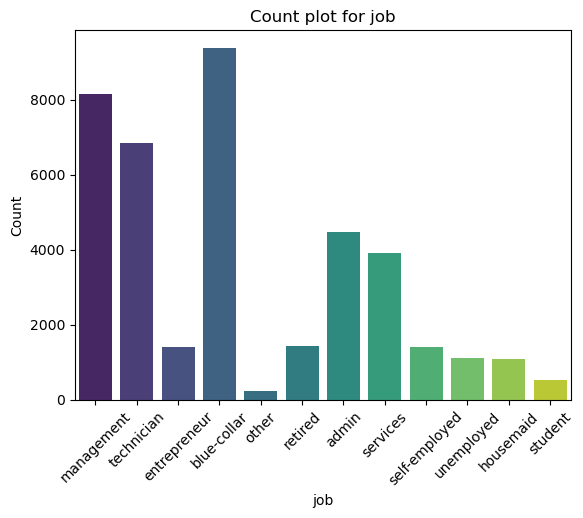

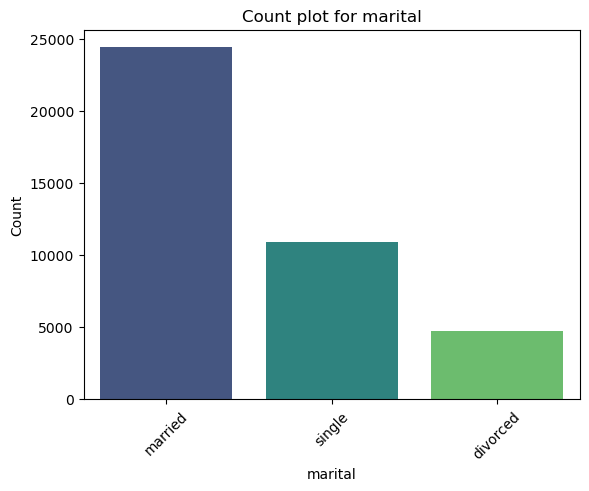

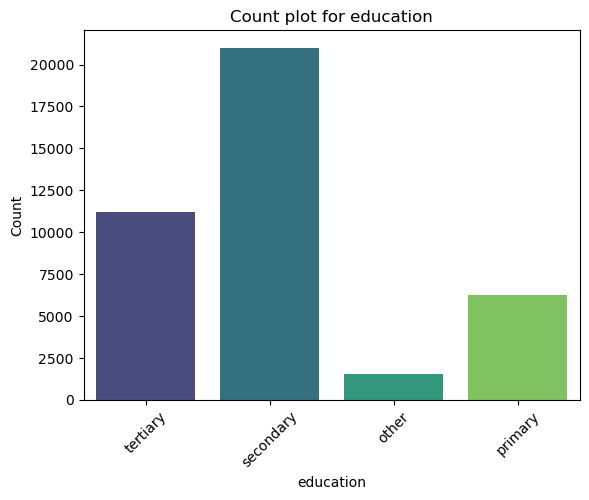

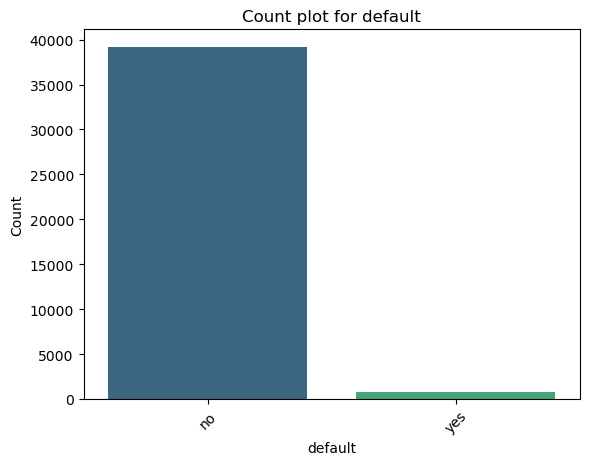

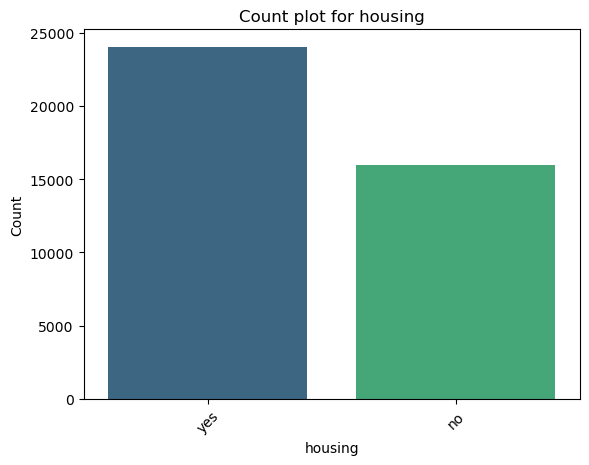

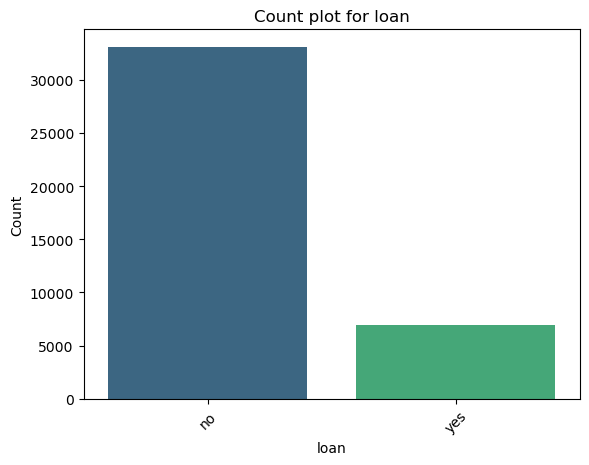

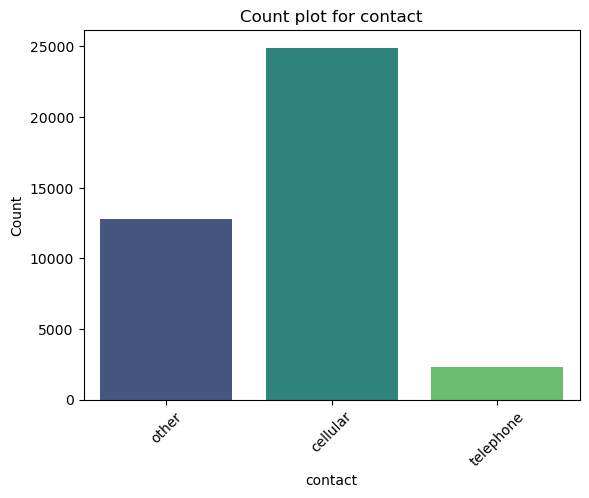

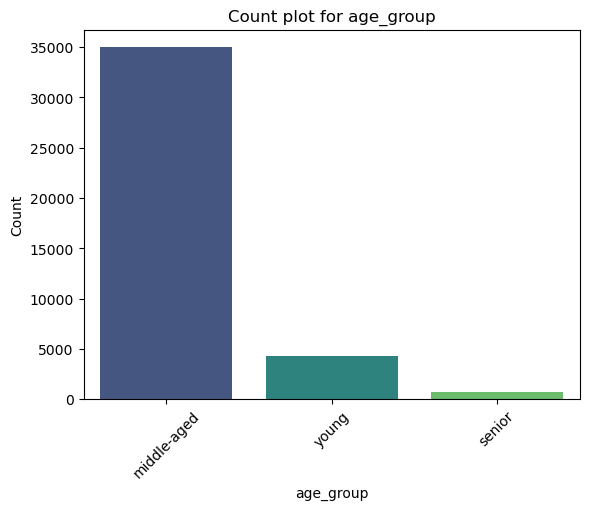

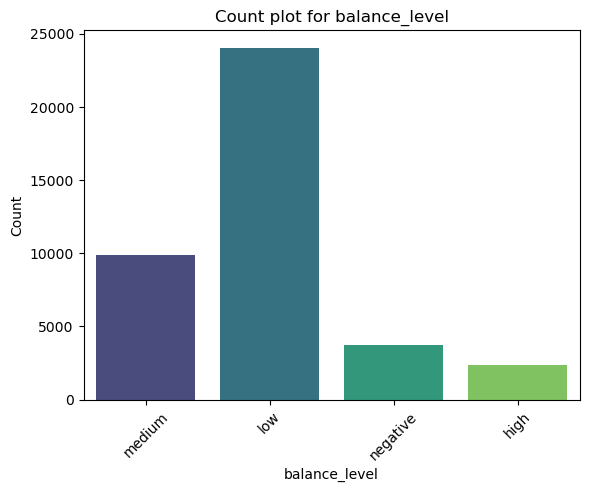

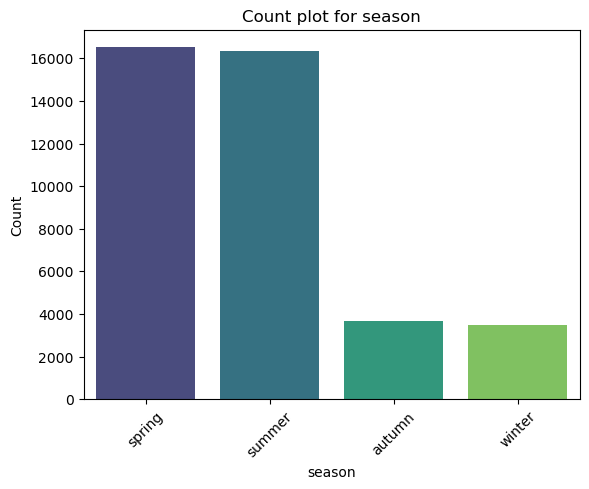

In [62]:
categorical_features = data.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure()
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f'Count plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [28]:
for col in categorical_features:
    print(f"\nUnique values in {col}:", data[col].unique())


Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'other' 'retired'
 'admin' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

Unique values in marital: ['married' 'single' 'divorced']

Unique values in education: ['tertiary' 'secondary' 'other' 'primary']

Unique values in default: ['no' 'yes']

Unique values in housing: ['yes' 'no']

Unique values in loan: ['no' 'yes']

Unique values in contact: ['other' 'cellular' 'telephone']

Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']

Unique values in y: ['no' 'yes']

Unique values in age_group: ['middle-aged' 'young' 'senior']

Unique values in balance_level: ['medium' 'low' 'negative' 'high']

Unique values in season: ['spring' 'summer' 'autumn' 'winter']


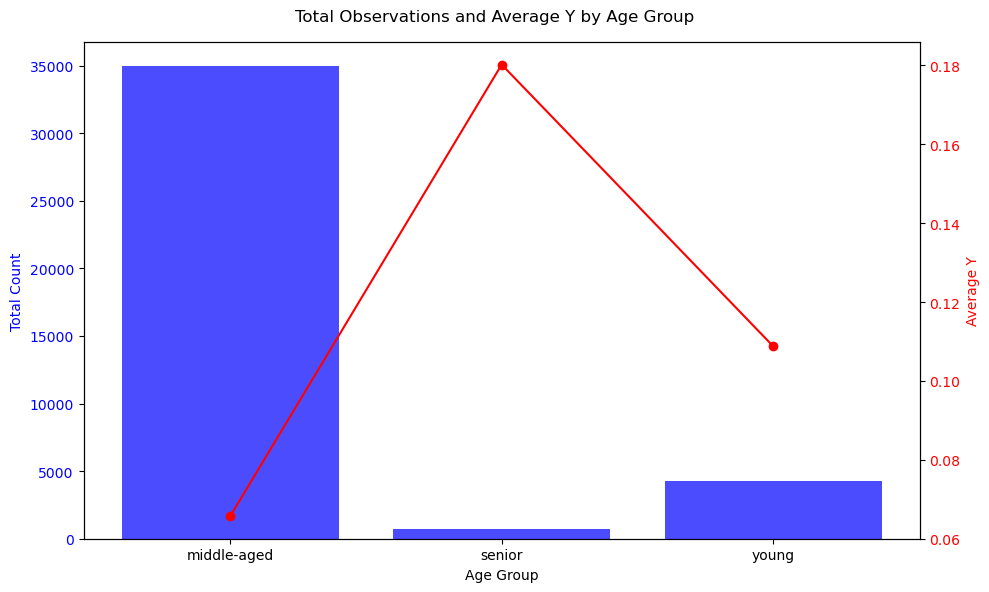

In [29]:
age_group_columns = ['age_group_senior', 'age_group_young']
df['age_group'] = df.apply(lambda row: 'senior' if row['age_group_senior'] == 1 else ('young' if row['age_group_young'] == 1 else 'other'), axis=1)

grouped_data = data.groupby('age_group').agg(total_count=('age_group', 'size'), avg_y=('y', lambda x: (x == 'yes').mean())).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar graph
ax1.bar(grouped_data['age_group'], grouped_data['total_count'], color='blue', alpha=0.7, label='Total Count')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line graph
ax2 = ax1.twinx()
ax2.plot(grouped_data['age_group'], grouped_data['avg_y'], color='red', marker='o', label='Avg Y (Conversion Rate)')
ax2.set_ylabel('Average Y', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Total Observations and Average Y by Age Group')
fig.tight_layout()
plt.show()

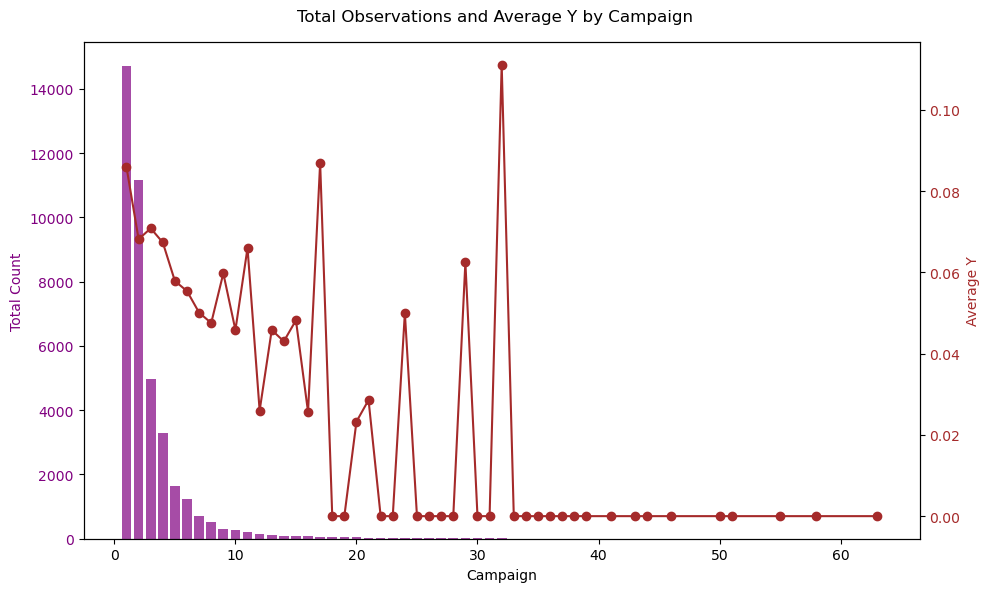

In [30]:
campaign_data = df.groupby('campaign').agg(total_count=('campaign', 'size'), avg_y=('y', lambda x: (x == 'yes').mean())).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar graph
ax1.bar(campaign_data['campaign'], campaign_data['total_count'], color='purple', alpha=0.7, label='Total Count')
ax1.set_xlabel('Campaign')
ax1.set_ylabel('Total Count', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Line graph
ax2 = ax1.twinx()
ax2.plot(campaign_data['campaign'], campaign_data['avg_y'], color='brown', marker='o', label='Avg Y (Conversion Rate)')
ax2.set_ylabel('Average Y', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

fig.suptitle('Total Observations and Average Y by Campaign')
fig.tight_layout()
plt.show()

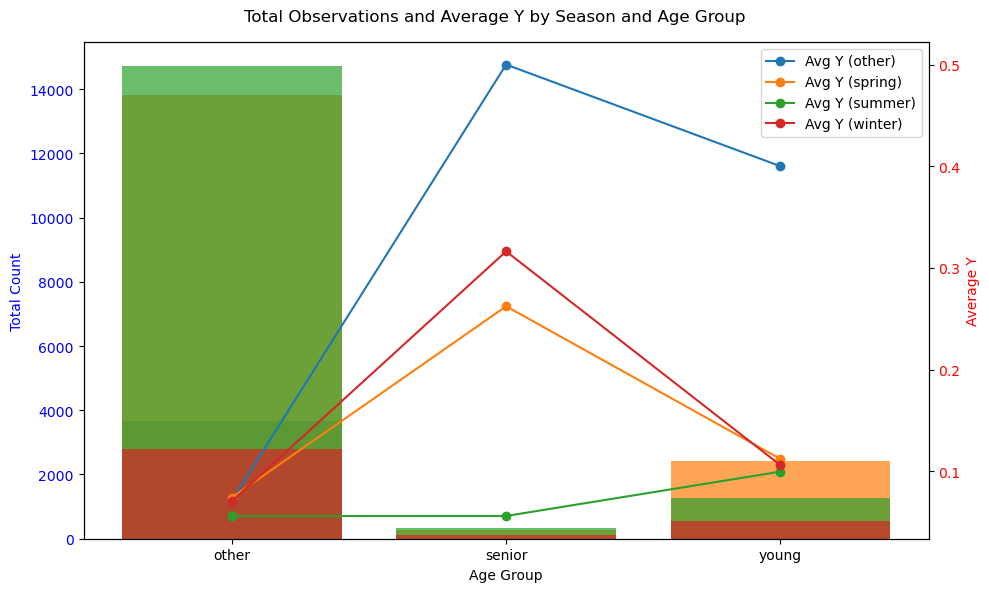

In [31]:
season_columns = ['season_spring', 'season_summer', 'season_winter']
df['season'] = df.apply(lambda row: 'spring' if row['season_spring'] == 1 else ('summer' if row['season_summer'] == 1 else ('winter' if row['season_winter'] == 1 else 'other')), axis=1)

season_age_group_data = df.groupby(['season', 'age_group']).agg(total_count=('age_group', 'size'), avg_y=('y', lambda x: (x == 'yes').mean())).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar graph for total observations by season and age group
for season in season_age_group_data['season'].unique():
    subset = season_age_group_data[season_age_group_data['season'] == season]
    ax1.bar(subset['age_group'], subset['total_count'], alpha=0.7, label=f'Total Count ({season})')

ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line graph for average Y by season and age group
ax2 = ax1.twinx()
for season in season_age_group_data['season'].unique():
    subset = season_age_group_data[season_age_group_data['season'] == season]
    ax2.plot(subset['age_group'], subset['avg_y'], marker='o', label=f'Avg Y ({season})')

ax2.set_ylabel('Average Y', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Total Observations and Average Y by Season and Age Group')
fig.tight_layout()
plt.legend()
plt.show()

In [33]:
# Preparing data for Random Forest Model
# Encoding the target variable 'y'
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Splitting features and target
target = 'y'
features = df.drop(columns=['y'])

In [34]:
# Handling categorical features using one-hot encoding
features = pd.get_dummies(features, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.3, random_state=42, stratify=data[target])

# Training the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [35]:
X_train


,age,balance,day,duration,campaign,call_efficiency,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,age_group_senior,age_group_young,season_spring,season_summer,season_winter
26630,59,644,20,547,2,182.333333,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
37473,41,-664,13,185,4,37.000000,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
31226,44,250,2,382,2,127.333333,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
33215,28,222,20,13,5,2.166667,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
717,39,607,6,99,2,33.000000,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37857,32,15,14,226,1,113.000000,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
26813,36,0,20,378,8,42.000000,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1340,49,168,8,513,1,256.500000,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
13902,53,61,10,190,1,95.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     11131
           1       0.60      0.34      0.44       869

    accuracy                           0.94     12000
   macro avg       0.78      0.66      0.70     12000
weighted avg       0.93      0.94      0.93     12000


Accuracy Score: 0.9359166666666666


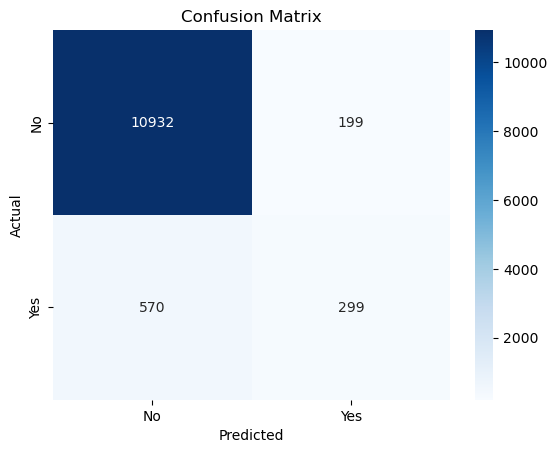

In [36]:
# Evaluating the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


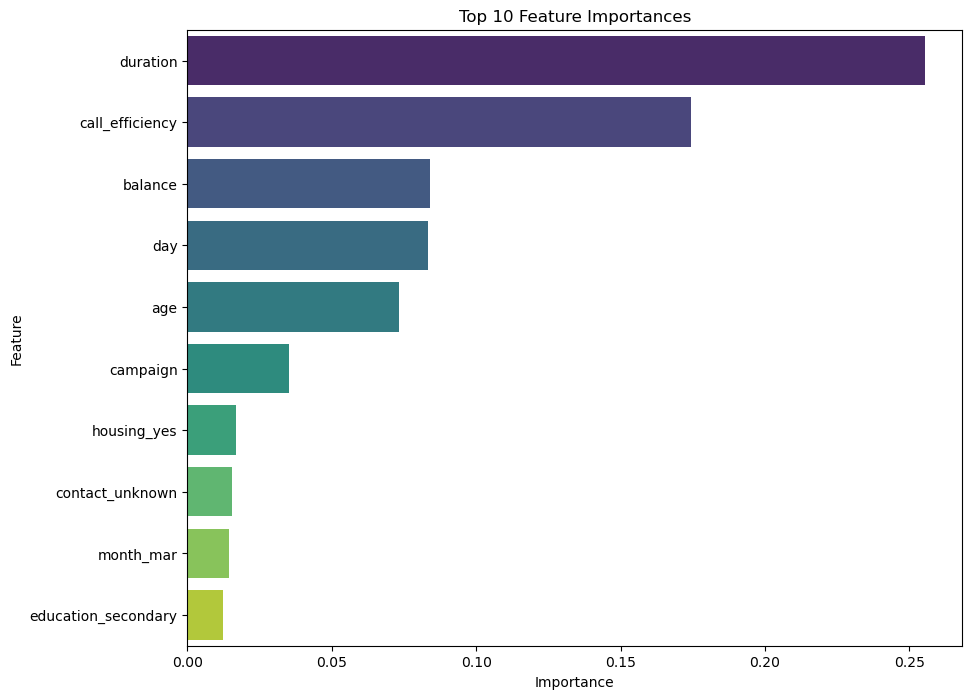


Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'other' 'retired'
 'admin' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

Unique values in marital: ['married' 'single' 'divorced']

Unique values in education: ['tertiary' 'secondary' 'other' 'primary']

Unique values in default: ['no' 'yes']

Unique values in housing: ['yes' 'no']

Unique values in loan: ['no' 'yes']

Unique values in contact: ['other' 'cellular' 'telephone']

Unique values in age_group: ['middle-aged' 'young' 'senior']

Unique values in balance_level: ['medium' 'low' 'negative' 'high']

Unique values in season: ['spring' 'summer' 'autumn' 'winter']


In [37]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Insights (Example Code)
# Print unique values for categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(f"\nUnique values in {col}:", data[col].unique())

Duaration is one of the main key factors to stand out for customers outcomes. So, the more calls you make to 
the customers more chances are there that customer will subscribe. Taking age also into consideration
middle aged group is more likely to subscribe with a low balance amount in their account.

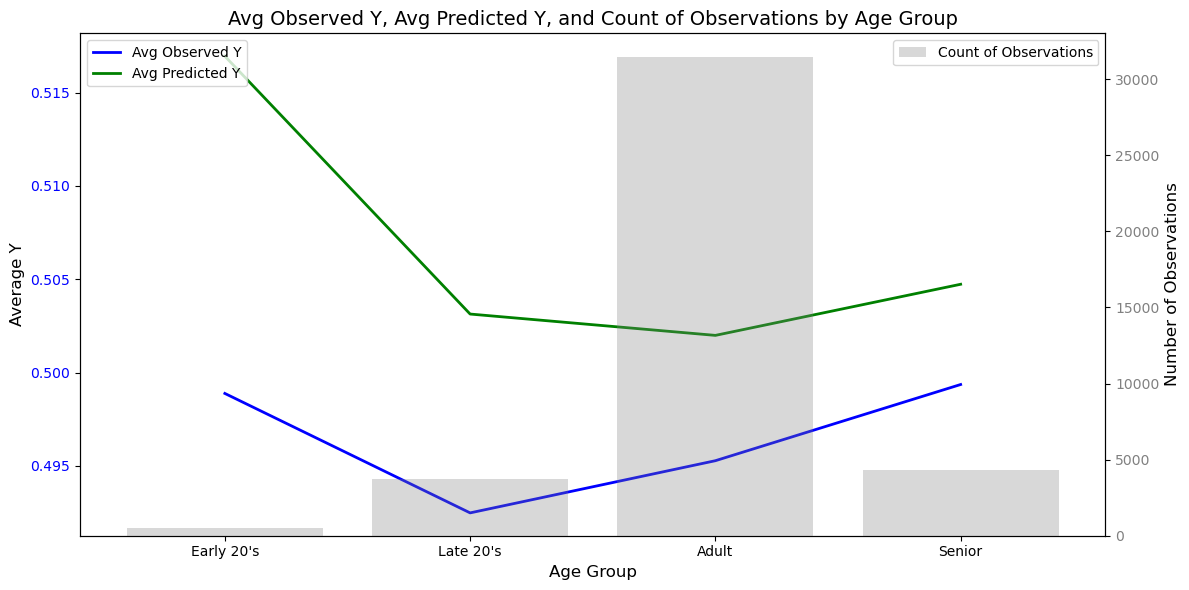

In [23]:
# Simulate Observed_Y and Predicted_Y for demonstration (remove if you already have these columns)
data['Observed_Y'] = np.random.rand(len(data))
data['Predicted_Y'] = np.random.rand(len(data))

# Define age groups
def categorize_age(age):
    if 20 <= age < 25:
        return "Early 20's"
    elif 25 <= age < 30:
        return "Late 20's"
    elif 30 <= age < 55:
        return "Adult"
    elif age >= 55:
        return "Senior"
    else:
        return None  # For ages outside defined groups

# Add age groups to the dataset
data['Age_Group'] = data['age'].apply(categorize_age)

# Group by age group and calculate averages and count
grouped_data = data.groupby('Age_Group').agg(
    Avg_Observed_Y=('Observed_Y', 'mean'),
    Avg_Predicted_Y=('Predicted_Y', 'mean'),
    Count=('Observed_Y', 'size')
).reset_index()

# Remove NaN values (if any) in Age_Group
grouped_data = grouped_data.dropna(subset=['Age_Group'])

# Sort the age groups for proper visualization
age_order = ["Early 20's", "Late 20's", "Adult", "Senior"]
grouped_data['Age_Group'] = pd.Categorical(grouped_data['Age_Group'], categories=age_order, ordered=True)
grouped_data = grouped_data.sort_values('Age_Group')

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for average observed and predicted Y vs age group
ax1.plot(grouped_data['Age_Group'], grouped_data['Avg_Observed_Y'], label='Avg Observed Y', color='blue', linewidth=2)
ax1.plot(grouped_data['Age_Group'], grouped_data['Avg_Predicted_Y'], label='Avg Predicted Y', color='green', linewidth=2)
ax1.set_xlabel('Age Group', fontsize=12)
ax1.set_ylabel('Average Y', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Bar plot for number of observations vs age group
ax2 = ax1.twinx()
ax2.bar(grouped_data['Age_Group'], grouped_data['Count'], alpha=0.3, color='gray', label='Count of Observations')
ax2.set_ylabel('Number of Observations', fontsize=12)
ax2.tick_params(axis='y', labelcolor='gray')
ax2.legend(loc='upper right')

# Titles and layout
plt.title("Avg Observed Y, Avg Predicted Y, and Count of Observations by Age Group", fontsize=14)
plt.tight_layout()
plt.show()


I have performed the XGBoost Classifier for classification report

In [10]:
X = data.drop(columns=['y'])  # Features
y = data['y']  # Target variable

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'no' -> 0, 'yes' -> 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Handle categorical features if present (one-hot encoding for XGBoost compatibility)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test sets have the same features
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train the XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    n_estimators=500,  # Number of trees
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = xgb_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)


/Users/pragatpagariya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:58:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

          no       0.96      0.98      0.97      7421
         yes       0.58      0.42      0.49       579

    accuracy                           0.94      8000
   macro avg       0.77      0.70      0.73      8000
weighted avg       0.93      0.94      0.93      8000



As we know there is a imbalance in dataset as there are many negatives in comparison with yes's. 
SMOTE (Synthetic Minority Oversampling Technique) is a statistical technique used in machine learning to address the issue of class imbalance in datasets. 

In [11]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    n_estimators=500,  # Number of trees
    random_state=42
)
xgb_model.fit(X_train_smote, y_train_smote)

# Predict and evaluate the model
y_pred = xgb_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)


/Users/pragatpagariya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/pragatpagariya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:58:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

          no       0.96      0.96      0.96      7421
         yes       0.50      0.49      0.50       579

    accuracy                           0.93      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.93      0.93      0.93      8000



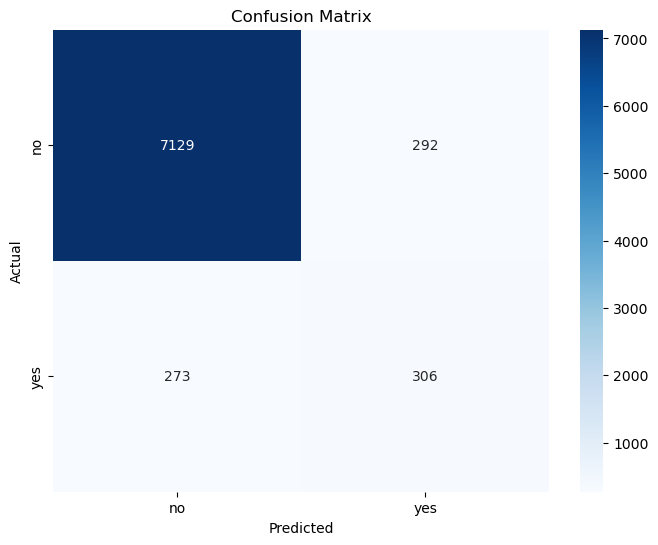

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SMOTE generates synthetic samples for the minority class, balancing the dataset and reducing model bias toward the majority class.
Sample weights are used to give more importance to specific samples (e.g., minority class samples) during training.
Weights also ensures the model gives more importance to misclassifications in the minority class during training.

/Users/pragatpagariya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/pragatpagariya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:04:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

          no       0.97      0.94      0.96      7421
         yes       0.46      0.66      0.55       579

    accuracy                           0.92      8000
   macro avg       0.72      0.80      0.75      8000
weighted avg       0.94      0.92      0.93      8000



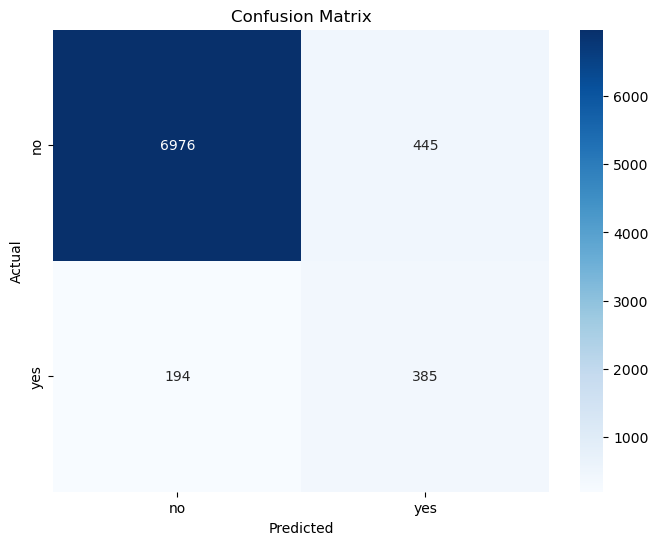

In [12]:

data = pd.read_csv('term_transformed.csv')

# Prepare features and target variable
X = data.drop(columns=['y'])  # Features
y = data['y']  # Target variable

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Handle categorical features if present (one-hot encoding for XGBoost compatibility)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test sets have the same features
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create sample weights
# Assign higher weights to the minority class
class_weights = {0: 1, 1: 3}  # Example: weight 'yes' (1) three times more than 'no' (0)
sample_weights = np.array([class_weights[label] for label in y_train_smote])

# Train the XGBoost model with sample weights
xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    n_estimators=100,  # Number of trees
    random_state=42
)
xgb_model.fit(X_train_smote, y_train_smote, sample_weight=sample_weights)

# Predict and evaluate the model
y_pred = xgb_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


As we can see a clear difference in the recall of the minority class as it has been improved. 


In the below code I have explained the ROC curve for the XGBoost model and there is a threshold for every F1 score
and the chart depicts the same. 

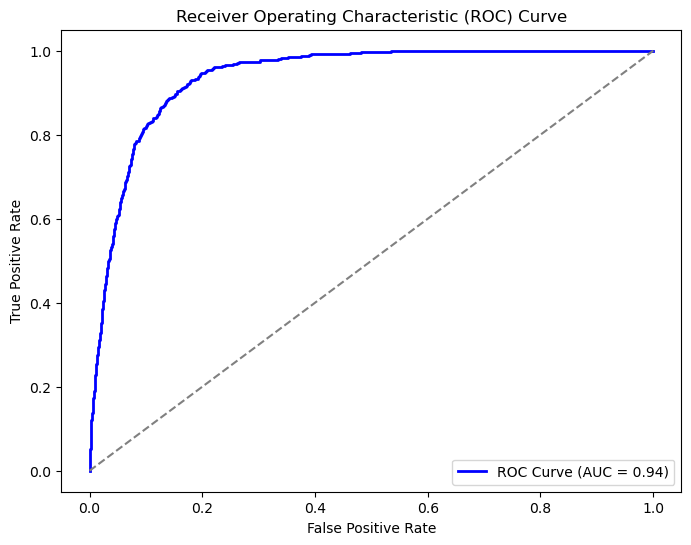

In [46]:
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



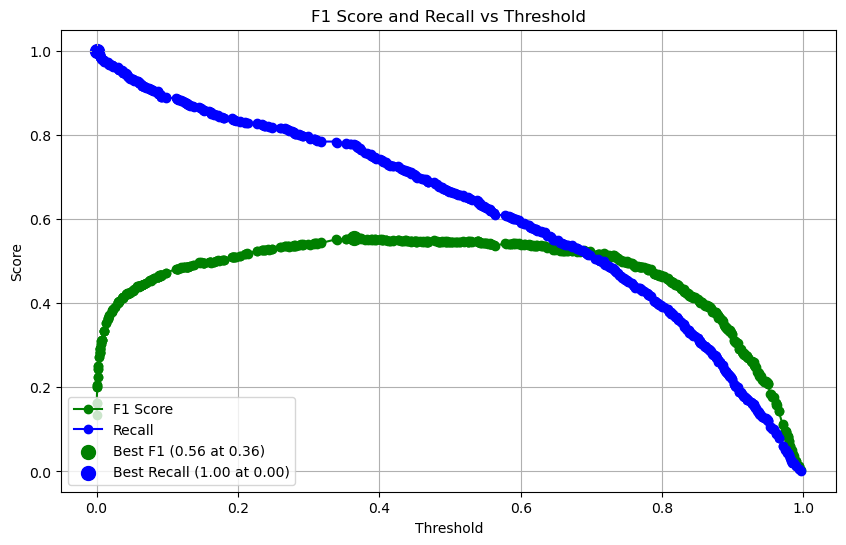

In [42]:
# Evaluate F1 and Recall scores at different thresholds
f1_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1_scores.append((threshold, f1))
    recall_scores.append((threshold, recall))

# Find the best threshold for F1 and Recall
best_f1_threshold, best_f1 = max(f1_scores, key=lambda x: x[1])
best_recall_threshold, best_recall = max(recall_scores, key=lambda x: x[1])

# Sort scores by threshold for plotting
thresholds_sorted, f1_sorted = zip(*sorted(f1_scores))
_, recall_sorted = zip(*sorted(recall_scores))

# Plot F1 Score and Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds_sorted, f1_sorted, label='F1 Score', marker='o', color='green')
plt.plot(thresholds_sorted, recall_sorted, label='Recall', marker='o', color='blue')

# Highlight best F1 and Recall points
plt.scatter(best_f1_threshold, best_f1, color='green', s=100, label=f'Best F1 ({best_f1:.2f} at {best_f1_threshold:.2f})')
plt.scatter(best_recall_threshold, best_recall, color='blue', s=100, label=f'Best Recall ({best_recall:.2f} at {best_recall_threshold:.2f})')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('F1 Score and Recall vs Threshold')
plt.legend(loc='lower left')
plt.grid()
plt.show()


In [43]:
best_f1_threshold, best_f1 = max(f1_scores, key=lambda x: x[1])


In [44]:
best_recall_threshold, best_recall = max(recall_scores, key=lambda x: x[1])


In [45]:
print(f"Best F1 Score: {best_f1:.2f} at Threshold: {best_f1_threshold:.2f}")
print(f"Best Recall Score: {best_recall:.2f} at Threshold: {best_recall_threshold:.2f}")


Best F1 Score: 0.56 at Threshold: 0.36
Best Recall Score: 1.00 at Threshold: 0.00


By the above graph we can see best F1 score is 0.56 (Threshold:0.36)
Recall is 0.78 (Threshold 0.36)
By this we can set a threshold of 0.36 can perform our further metrices evaluation.

In [61]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.4).astype(int)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7421
           1       0.44      0.74      0.55       579

    accuracy                           0.91      8000
   macro avg       0.71      0.83      0.75      8000
weighted avg       0.94      0.91      0.92      8000

Confusion Matrix:
[[6871  550]
 [ 149  430]]


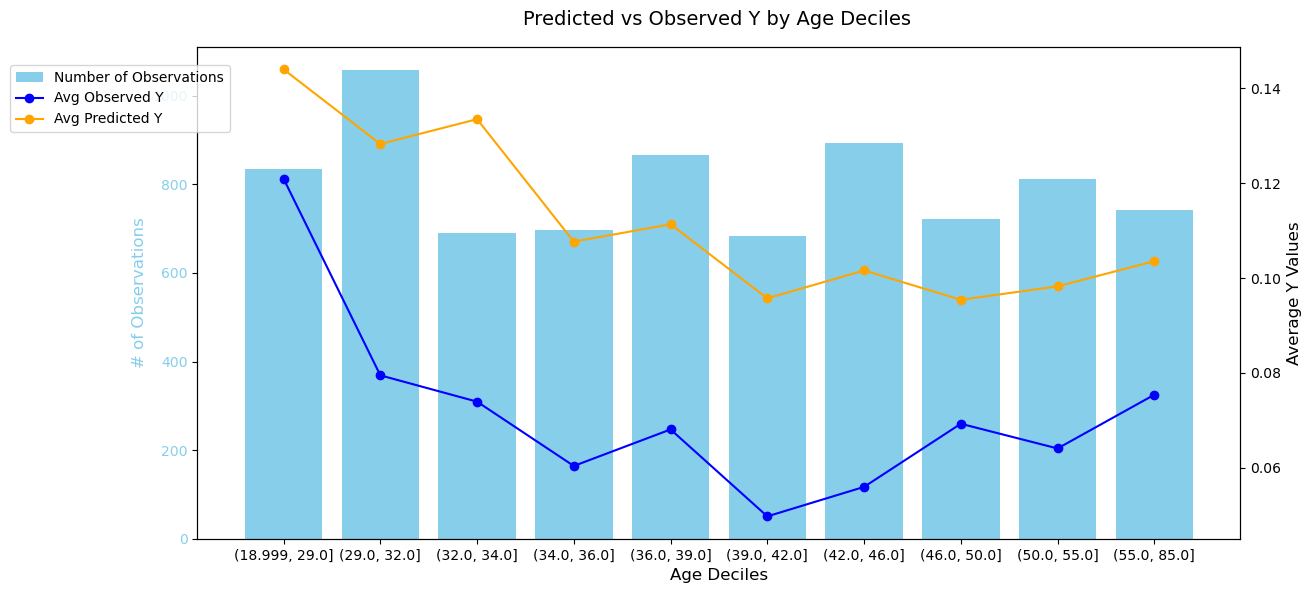

In [49]:
feature = 'age'  # Replace with the numerical feature you want to analyze
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Create deciles or custom groups for the feature
data_test['decile'] = pd.qcut(data_test[feature], q=10, duplicates='drop')

# Calculate averages and counts for each decile
decile_summary = data_test.groupby('decile').agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(decile_summary['decile'].astype(str), decile_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Deciles', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Deciles', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.1, 0.9))
plt.show()


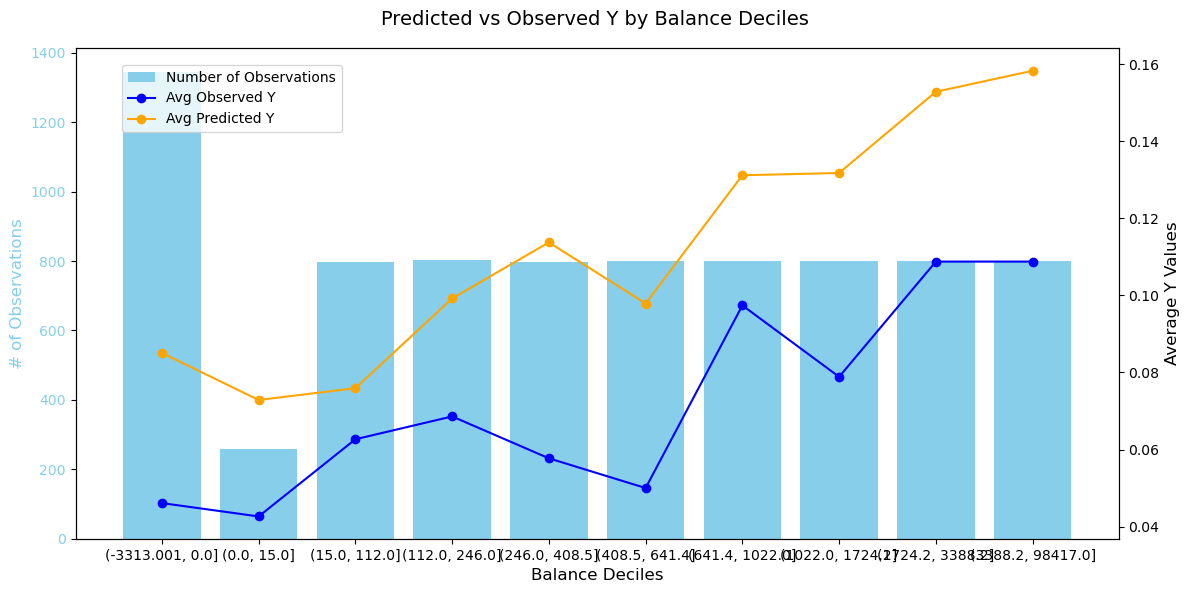

In [50]:
feature = 'balance'  # Using 'balance' as the numerical feature
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Create deciles or custom groups for the feature
data_test['decile'] = pd.qcut(data_test[feature], q=10, duplicates='drop')

# Calculate averages and counts for each decile
decile_summary = data_test.groupby('decile').agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(decile_summary['decile'].astype(str), decile_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Deciles', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Deciles', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


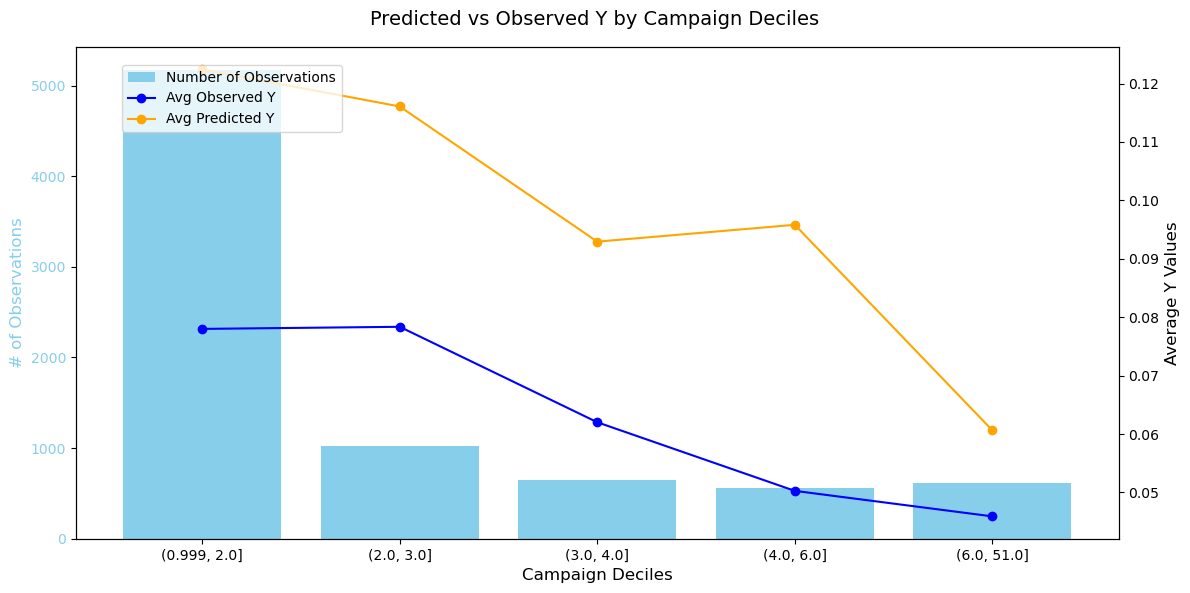

In [51]:
feature = 'campaign'  # Using 'balance' as the numerical feature
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Create deciles or custom groups for the feature
data_test['decile'] = pd.qcut(data_test[feature], q=10, duplicates='drop')

# Calculate averages and counts for each decile
decile_summary = data_test.groupby('decile').agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(decile_summary['decile'].astype(str), decile_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Deciles', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Deciles', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


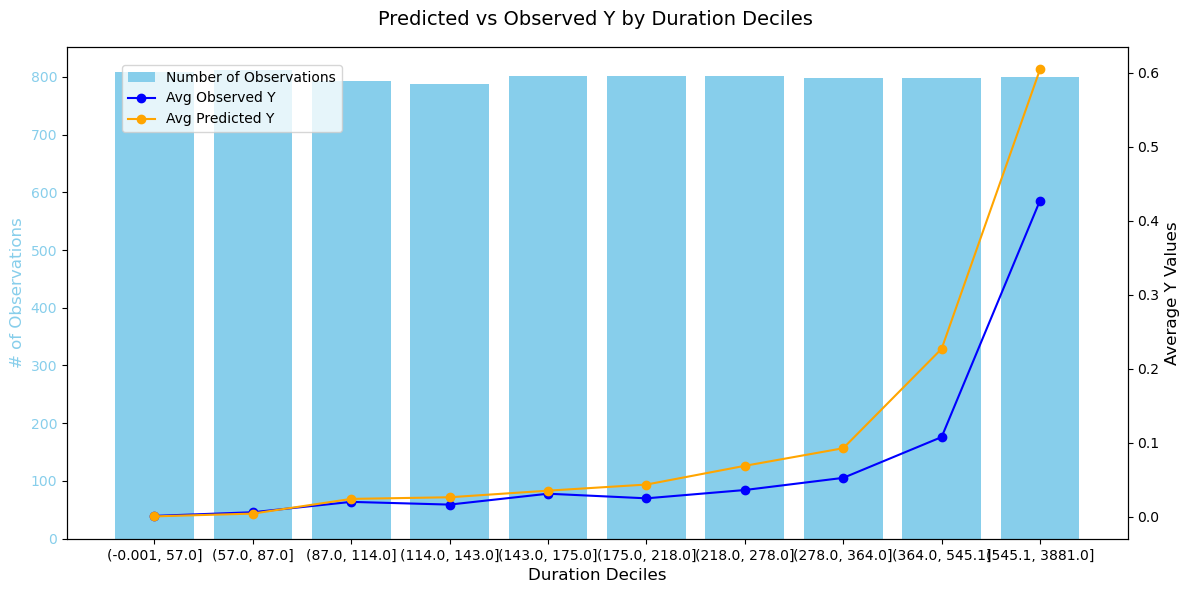

In [52]:
feature = 'duration'  # Using 'balance' as the numerical feature
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Create deciles or custom groups for the feature
data_test['decile'] = pd.qcut(data_test[feature], q=10, duplicates='drop')

# Calculate averages and counts for each decile
decile_summary = data_test.groupby('decile').agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(decile_summary['decile'].astype(str), decile_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Deciles', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Deciles', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


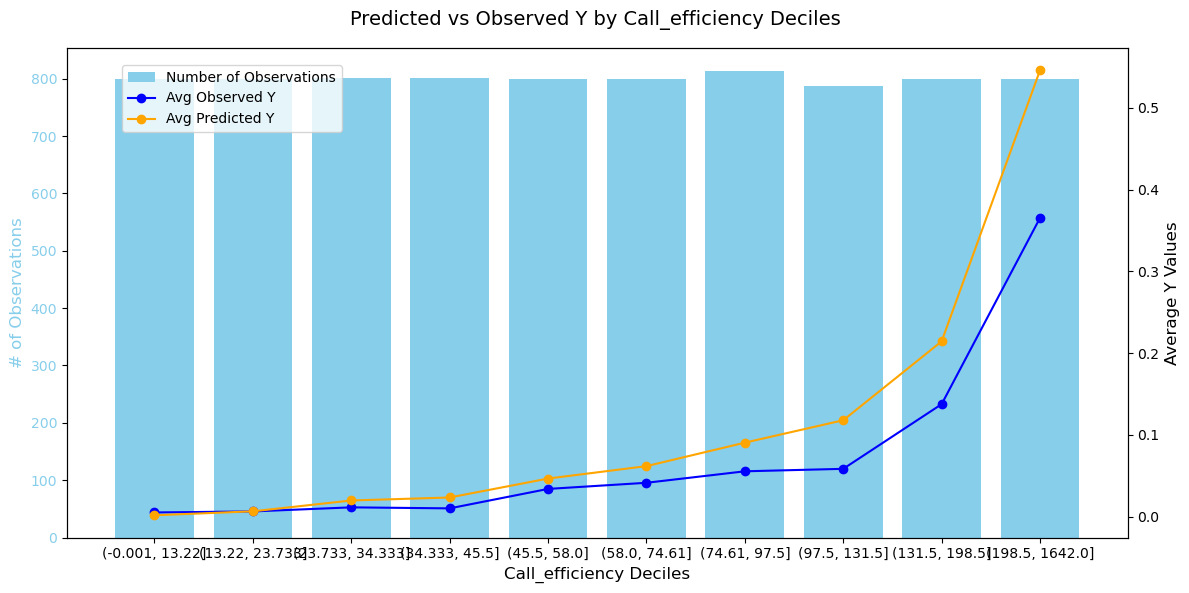

In [53]:
feature = 'call_efficiency'  # Using 'balance' as the numerical feature
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Create deciles or custom groups for the feature
data_test['decile'] = pd.qcut(data_test[feature], q=10, duplicates='drop')

# Calculate averages and counts for each decile
decile_summary = data_test.groupby('decile').agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(decile_summary['decile'].astype(str), decile_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Deciles', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Deciles', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


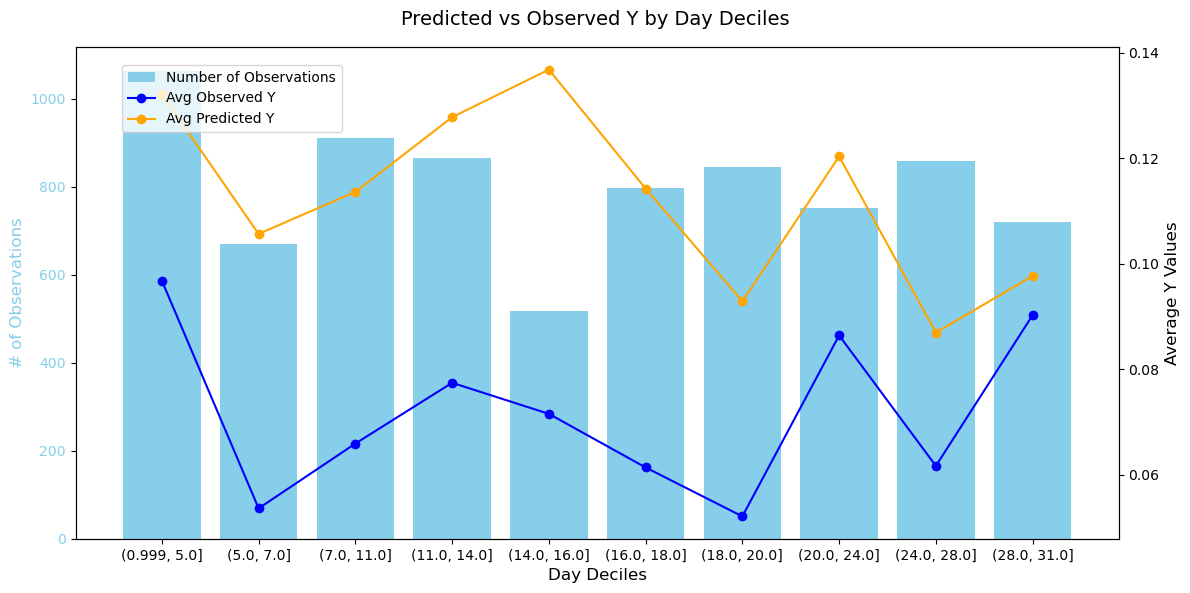

In [54]:
feature = 'day'  # Using 'balance' as the numerical feature
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Create deciles or custom groups for the feature
data_test['decile'] = pd.qcut(data_test[feature], q=10, duplicates='drop')

# Calculate averages and counts for each decile
decile_summary = data_test.groupby('decile').agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(decile_summary['decile'].astype(str), decile_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Deciles', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(decile_summary['decile'].astype(str), decile_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Deciles', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


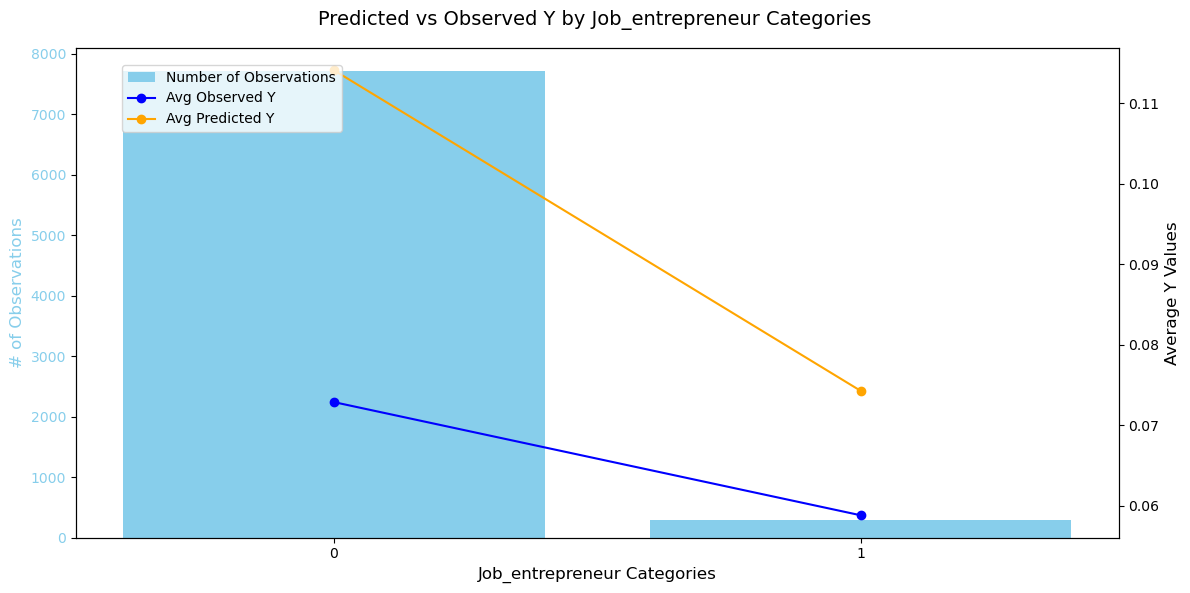

In [59]:
feature = 'job_entrepreneur'  # Using 'job_entrepreneur' as the categorical feature
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

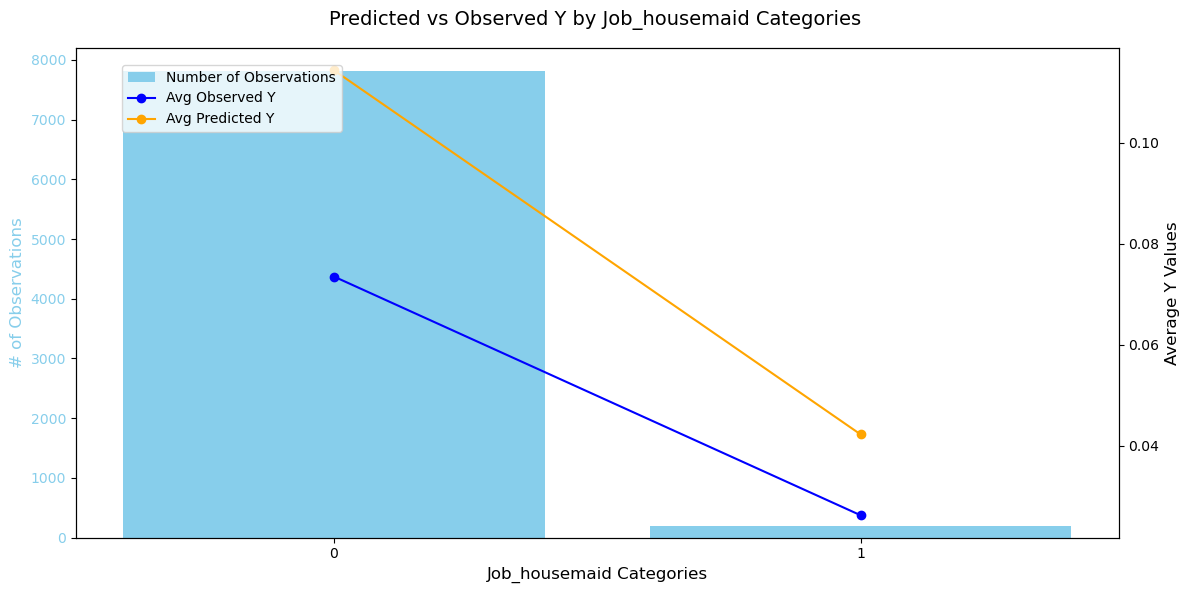

In [60]:
feature = 'job_housemaid'  
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

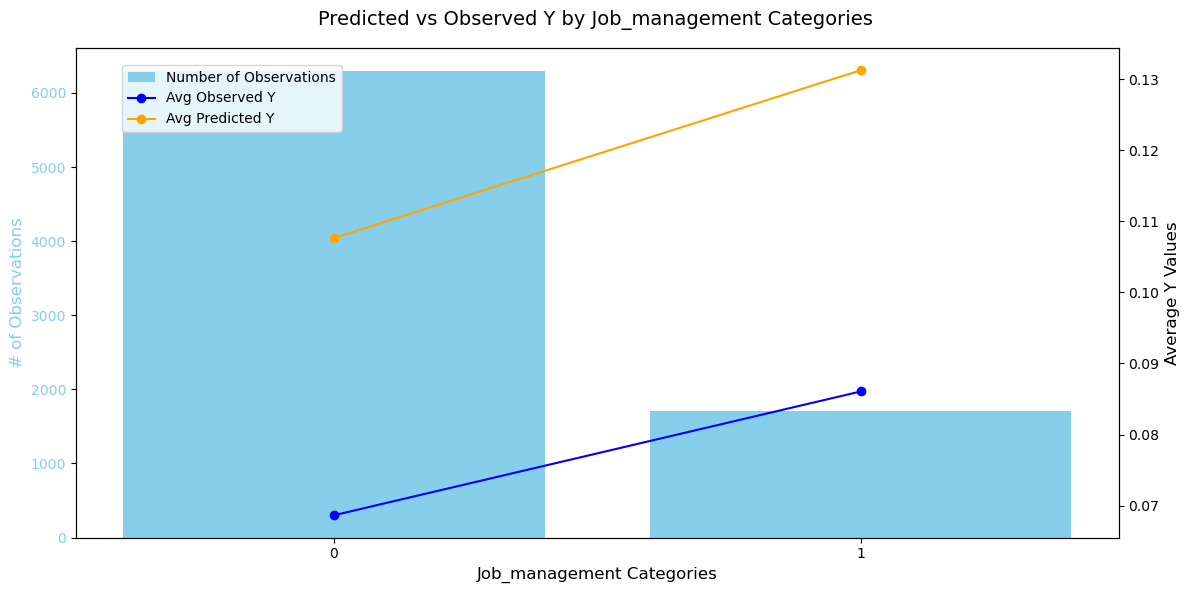

In [62]:
feature = 'job_management'  
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

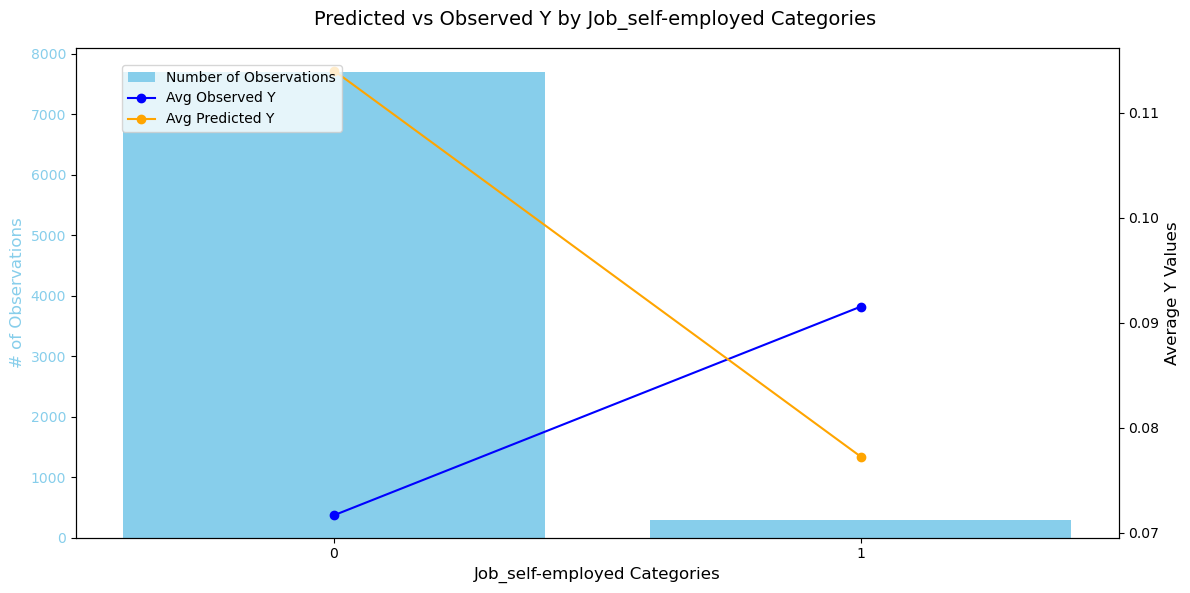

In [63]:
feature = 'job_self-employed'  
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

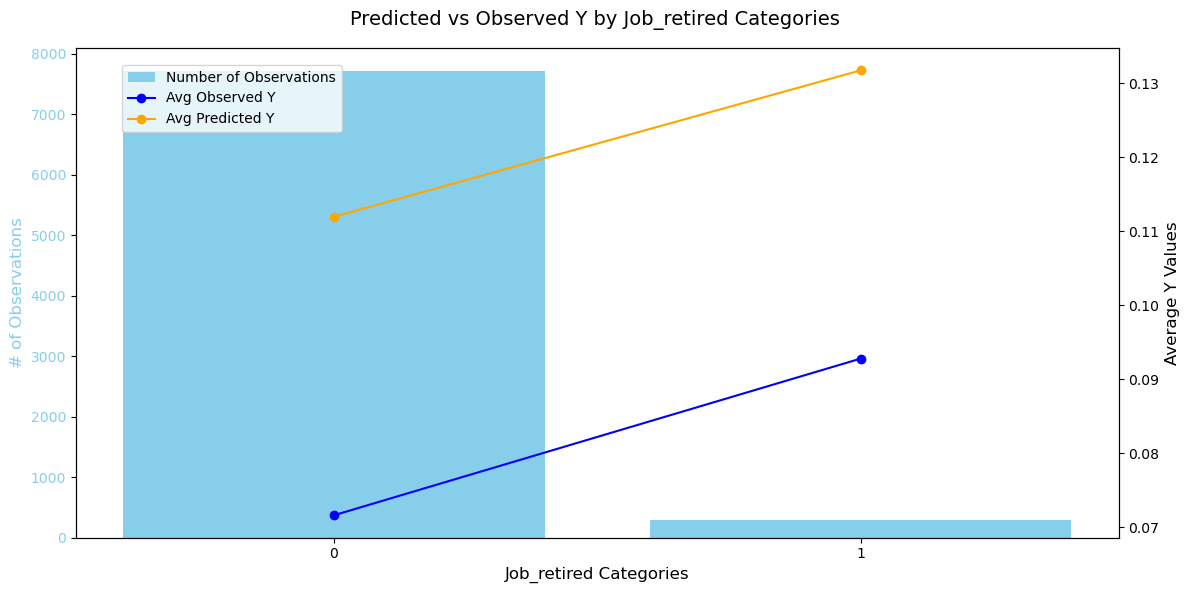

In [64]:
feature = 'job_retired' 
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

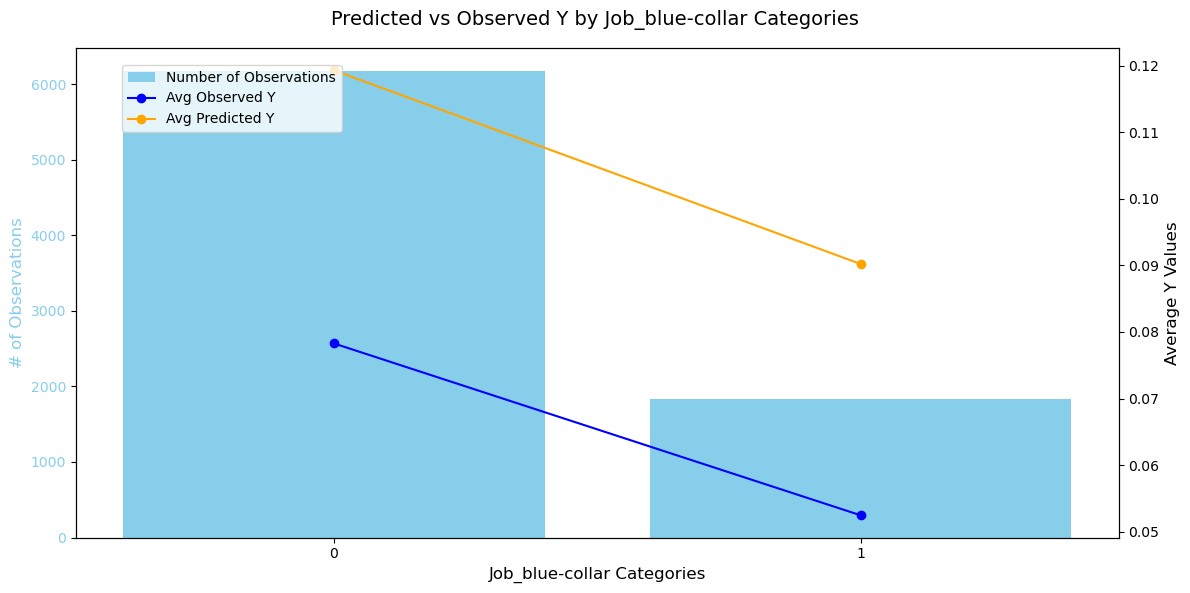

In [65]:
feature = 'job_blue-collar' 
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

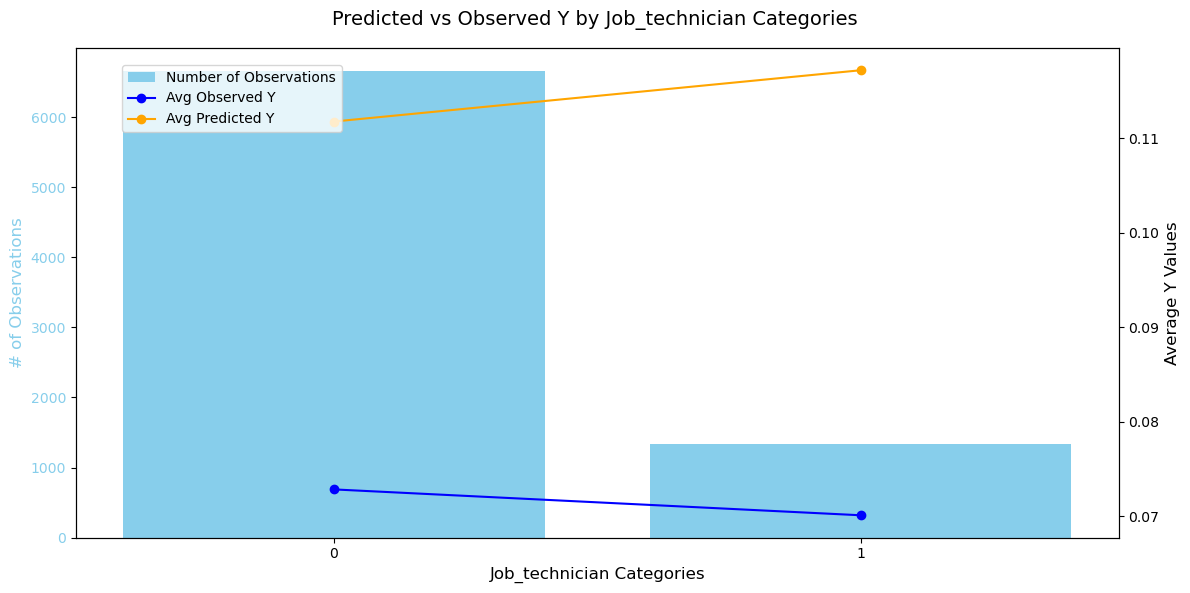

In [66]:
feature = 'job_technician' 
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

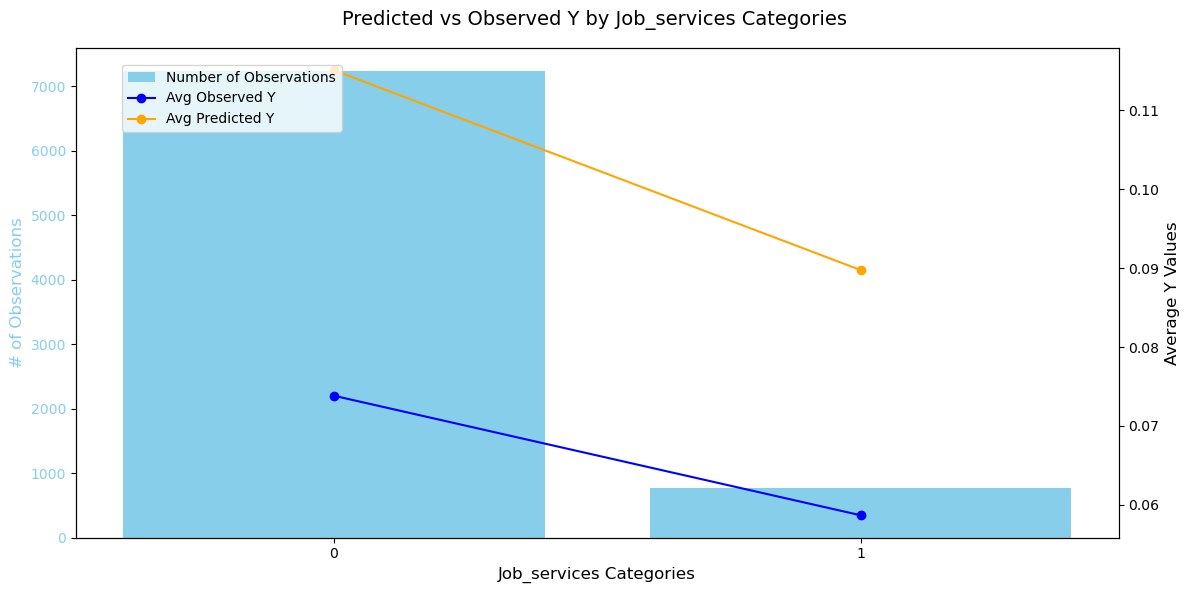

In [67]:
feature = 'job_services' 
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

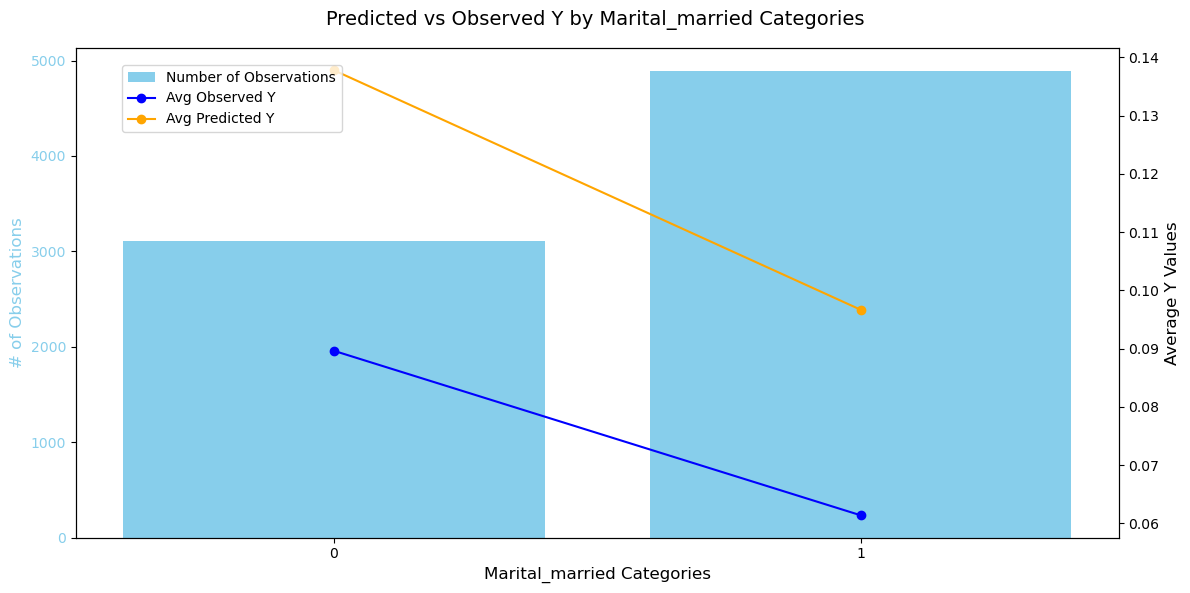

In [68]:
feature = 'marital_married' 
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

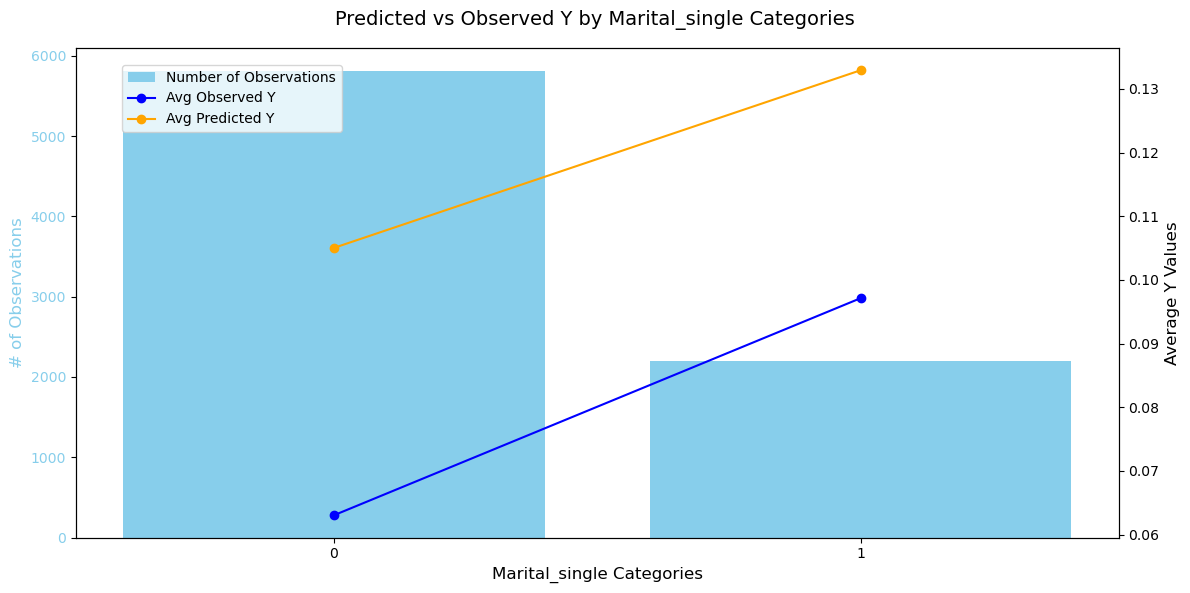

In [69]:
feature = 'marital_single' 
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

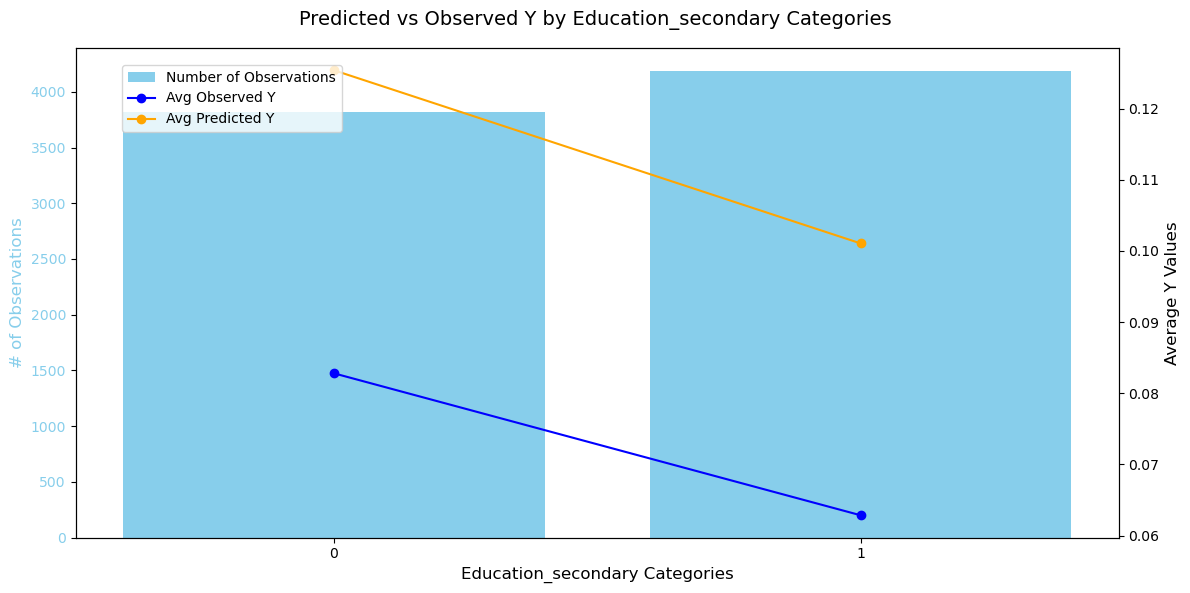

In [70]:
feature = 'education_secondary' 
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

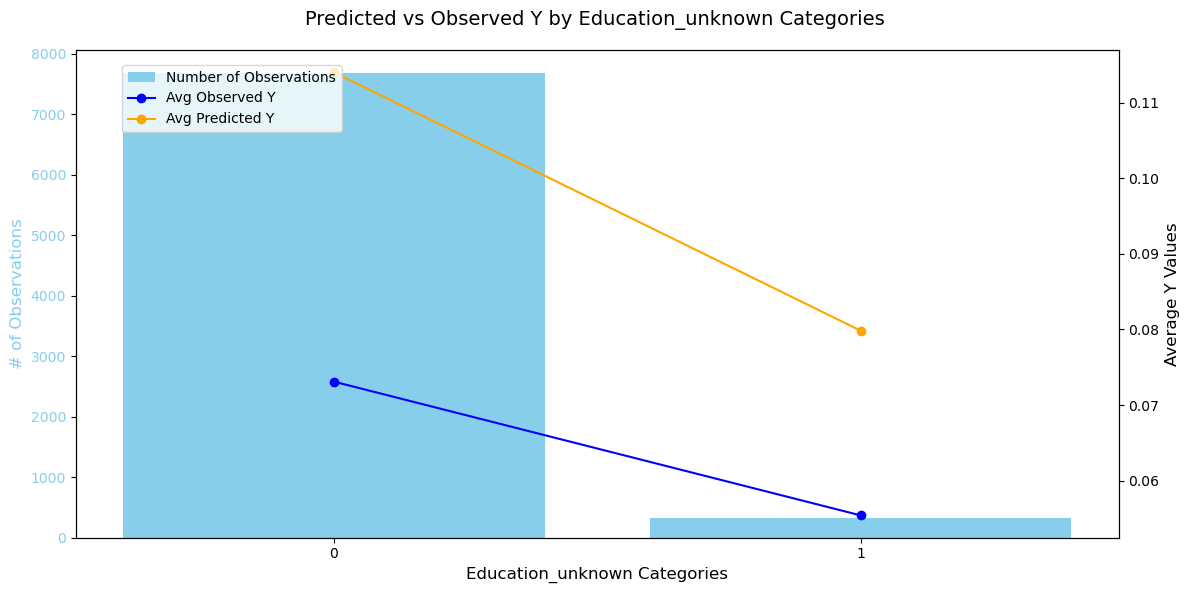

In [72]:
feature = 'education_unknown' 
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

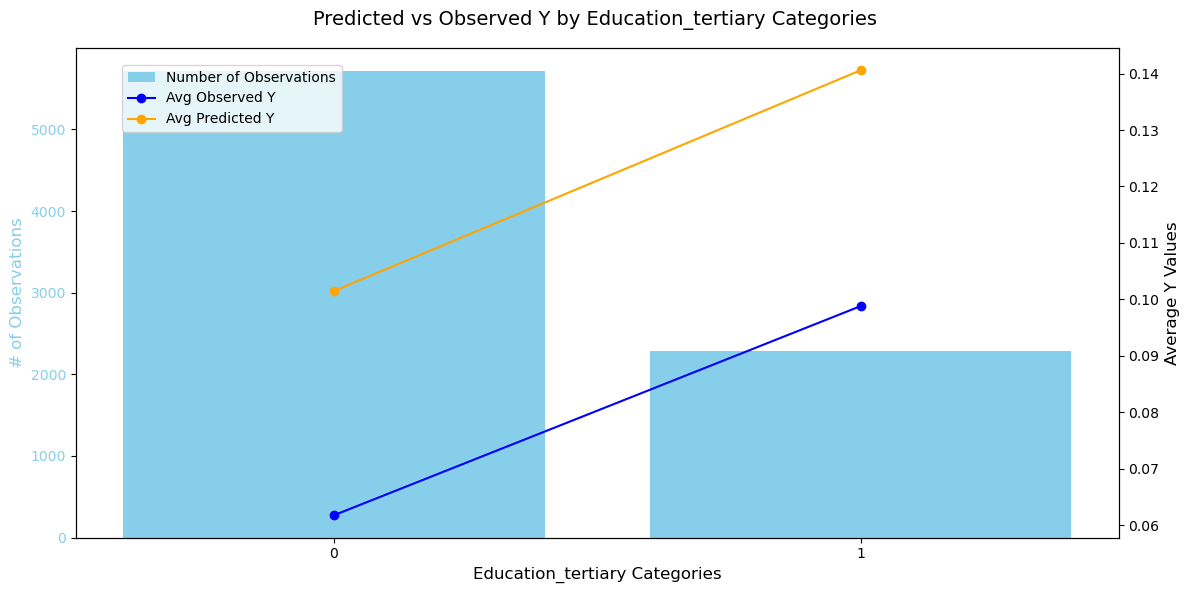

In [71]:
feature = 'education_tertiary' 
data_test = X_test.copy()
data_test['observed_y'] = y_test
data_test['predicted_y'] = y_prob

# Calculate averages and counts for job_entrepreneur
data_test[feature] = X_test[feature]  # Ensure the feature exists in the test set
feature_summary = data_test.groupby(feature).agg(
    avg_observed_y=('observed_y', 'mean'),
    avg_predicted_y=('predicted_y', 'mean'),
    num_observations=('observed_y', 'size')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of observations
ax1.bar(feature_summary[feature].astype(str), feature_summary['num_observations'], color='skyblue', label='Number of Observations')
ax1.set_xlabel(f'{feature.capitalize()} Categories', fontsize=12)
ax1.set_ylabel('# of Observations', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for average observed and predicted Y
ax2 = ax1.twinx()
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_observed_y'], color='blue', label='Avg Observed Y', marker='o')
ax2.plot(feature_summary[feature].astype(str), feature_summary['avg_predicted_y'], color='orange', label='Avg Predicted Y', marker='o')
ax2.set_ylabel('Average Y Values', fontsize=12)
ax2.tick_params(axis='y')

# Title and legends
fig.suptitle(f'Predicted vs Observed Y by {feature.capitalize()} Categories', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

Feature Importance:
                   Feature  Importance
28           season_summer    0.222589
23             housing_yes    0.109541
29           season_winter    0.075264
44               month_nov    0.067598
43               month_may    0.047808
3                 duration    0.044576
26         contact_unknown    0.042945
39               month_jan    0.031303
6          job_blue-collar    0.027286
18          marital_single    0.024147
40               month_jul    0.020643
36               month_aug    0.019802
17         marital_married    0.017591
24                loan_yes    0.016627
20      education_tertiary    0.016623
21       education_unknown    0.016435
10             job_retired    0.014782
8            job_housemaid    0.013908
27           season_spring    0.012976
11       job_self-employed    0.012943
19     education_secondary    0.012832
15          job_unemployed    0.012201
7         job_entrepreneur    0.012192
45               month_oct    0.010833
12   

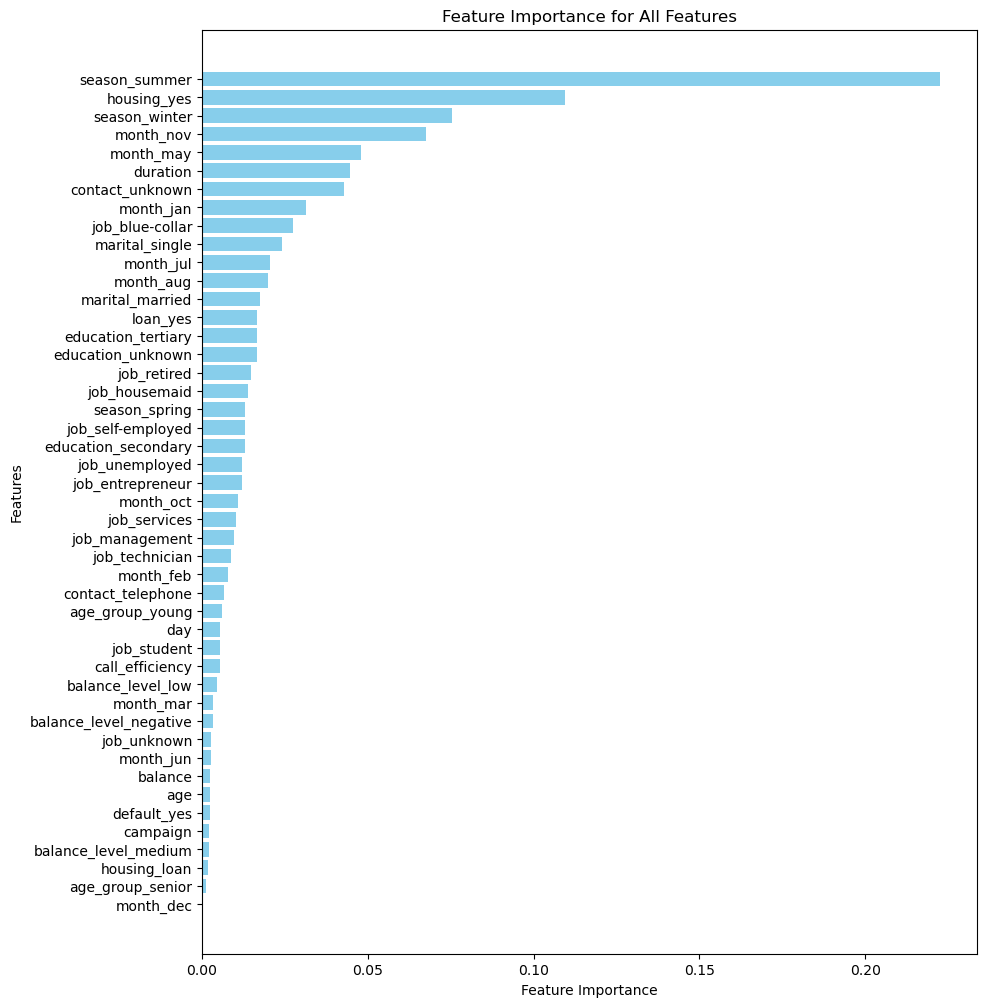

In [73]:
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print all features by importance
print("Feature Importance:")
print(importance_df)

# Plot all features by importance
plt.figure(figsize=(10, 12))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for All Features')
plt.gca().invert_yaxis()
plt.show()
